## MBAN 6500X – Assignment 1 

**-- Pratiksha ( Student #220137626 )**

________________________________________________________________________________________________________________________________________________________________________________

### Loading the Dataset

I first imported the basic libraries to my Jupiter Notebook which will help in my analysis and deciphering results.

In [1031]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier, GradientBoostingClassifier, HistGradientBoostingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, precision_recall_curve, roc_curve, auc, roc_auc_score, confusion_matrix, classification_report
import xgboost as xgb
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt



I have then extracted the dataset from the local file on my computer.

In [1032]:
df = pd.read_csv('/Users/pratiksha/Documents/Schulich/AI in Business I/train.csv')
df_test = pd.read_csv('/Users/pratiksha/Documents/Schulich/AI in Business I/test.csv')

I used the below function to display the first few rows of the DataFrame 'df', providing a preview of the train and test dataset.

In [1033]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [1034]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


I used the info() function which provides a concise summary of our train and test DataFrame, including its column names, data types, and non-null values.

In [1035]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [1036]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


This code prints the number of missing (null) values in each column of the "df" (train) and "df_test" (test/validation) datasets, showing the count of null values for each column.

In [1037]:
print('Train columns with null values:\n', df.isnull().sum())
print("-"*10)

print('Test/Validation columns with null values:\n', df_test.isnull().sum())
print("-"*10)

Train columns with null values:
 PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
----------
Test/Validation columns with null values:
 PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64
----------


I used the describe() function to generate descriptive statistics of the train and test dataset, such as count, mean, standard deviation, minimum, maximum, and quartile values, for each numerical column.

In [1038]:
df.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [1039]:
df_test.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


This line of code creates a copy of the DataFrame df named df_copy, allowing me to make changes or modifications to the copied DataFrame without affecting the original DataFrame df.

In [1040]:
df_copy = df.copy()

This code deletes the 'Cabin' and 'Ticket' columns from the data because they don't have enough information (missing data), and it could affect the accuracy of the analysis or predictions.

________________________________________________________________________________________________________________________________________________________________________________

### Data Cleaning

In [1041]:
df = df.drop([ 'Cabin', 'Ticket'], axis=1)


This code creates a new column named 'Title' in the DataFrame, extracting titles from the 'Name' column. It uses string splitting based on commas and periods to isolate the titles.

In [1042]:
df['Title'] = df['Name'].str.split(',').str[1].str.split('.').str[0].str.strip()

This code counts and displays the occurrences of each unique value in the 'Title' column of the DataFrame, showing the distribution of titles in the dataset.

In [1043]:
df['Title'].value_counts()

Title
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

This code replaces titles with fewer than 10 occurrences in the 'Title' column with the label 'Misc', grouping together less common titles for simplicity or better model performance.

In [1044]:
title_counts = df['Title'].value_counts()
rare_titles = title_counts[title_counts < 10].index
df['Title'] = df['Title'].replace(rare_titles, 'Misc')


This code displays the updated counts of different titles in the 'Title' column after the modification, where titles with fewer than 10 occurrences are now labeled as 'Misc'.

In [1045]:
df['Title'].value_counts()

Title
Mr        517
Miss      182
Mrs       125
Master     40
Misc       27
Name: count, dtype: int64


This code removes the 'Name' column from the DataFrame 'df', effectively dropping the column from the dataset.

In [1046]:
df= df.drop(['Name'], axis=1)

It will display the first few rows of the 'df'. This is useful to get a quick overview of the revised data.

In [1047]:
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,1,0,3,male,22.0,1,0,7.2500,S,Mr
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs
2,3,1,3,female,26.0,0,0,7.9250,S,Miss
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs
4,5,0,3,male,35.0,0,0,8.0500,S,Mr


This code groups the DataFrame 'df' by the 'Sex' column and calculates the mean (average) value of the 'Age' column for each group (male and female). It provides insights into the average age for each gender in the dataset.

In [1048]:
df.groupby('Sex')['Age'].mean()


Sex
female    27.915709
male      30.726645
Name: Age, dtype: float64

This code counts the occurrences of each unique value in the 'Embarked' column of the DataFrame 'df', providing a distribution of the different ports of embarkation in the dataset.

In [1049]:
df['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

This code displays the data types of each column in the DataFrame 'df', showing whether they are of numeric, object, or other types.

In [1050]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex             object
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked        object
Title           object
dtype: object

This code creates a side-by-side visualization of the 'Survived' column in the DataFrame 'df'. The left subplot is a pie chart representing the distribution of survived and not survived instances, and the right subplot is a countplot showing the count of each category with customized colors (blue for '0' and orange for '1').

________________________________________________________________________________________________________________________________________________________________________________

### Exploratory Data Analysis

/var/folders/9w/090_7gb54d54ppm4sfqk8xgr0000gn/T/ipykernel_78992/3048441537.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived', data=df, ax=ax[1], palette={'0': 'blue', '1': 'orange'})


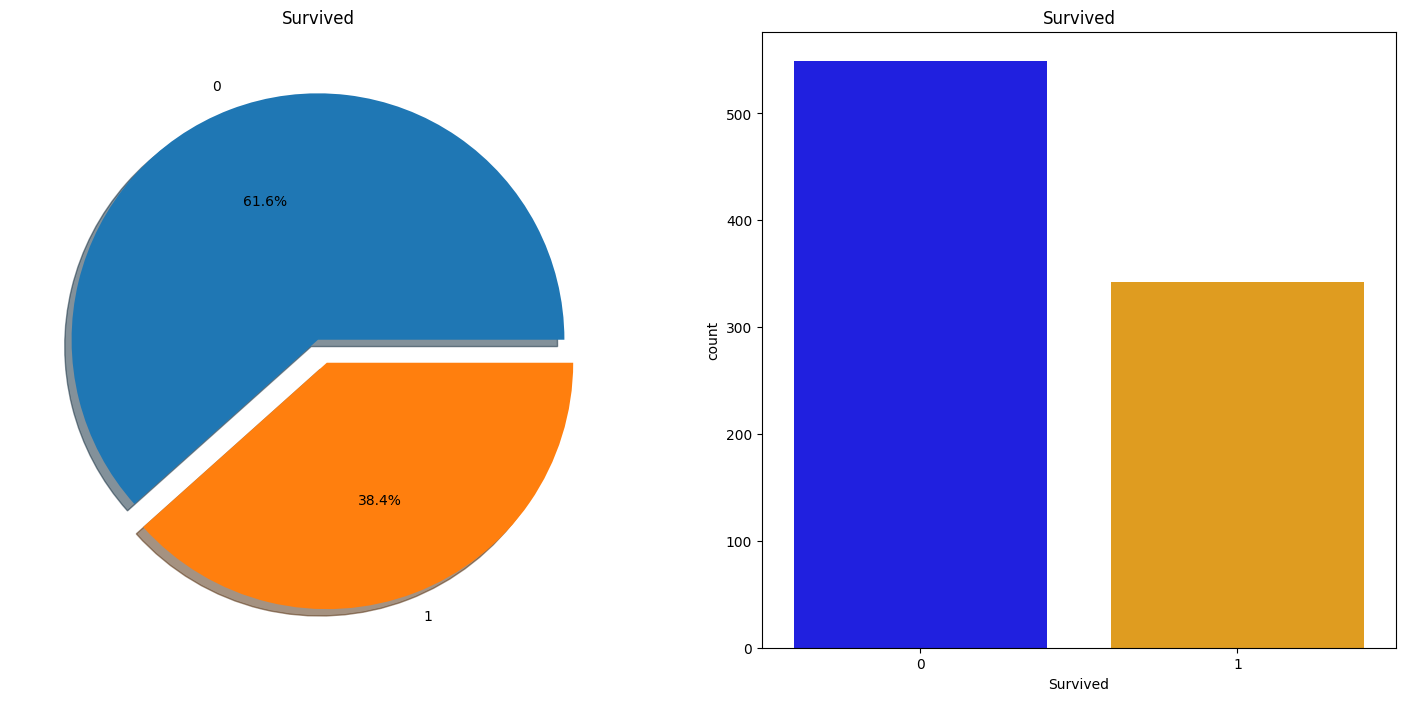

In [1051]:
# Convert 'Survived' column to string type
df['Survived'] = df['Survived'].astype(str)

f, ax = plt.subplots(1, 2, figsize=(18, 8))  # 1 row, 2 columns subplots

# Plotting the pie chart on ax[0]
df['Survived'].value_counts().plot.pie(explode=[0, 0.1], autopct='%1.1f%%', ax=ax[0], shadow=True)
ax[0].set_title('Survived')
ax[0].set_ylabel('')

# Plotting the countplot on ax[1] with customized colors
sns.countplot(x='Survived', data=df, ax=ax[1], palette={'0': 'blue', '1': 'orange'})
ax[1].set_title('Survived')

plt.show()

This code utilizes seaborn to create a histogram (histplot) of the 'Age' column in the DataFrame 'df'. The histogram provides a visual representation of the distribution of ages in the dataset.

<Axes: xlabel='Age', ylabel='Count'>

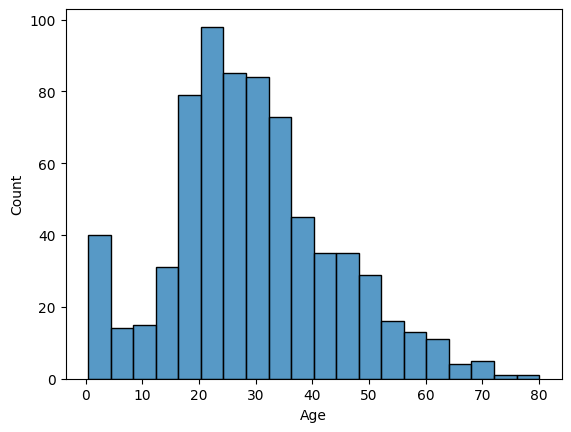

In [1052]:
sns.histplot(data=df, x='Age')

This code fills missing values in the 'Age' column with the mean age for each gender group ('Sex') and fills missing values in the 'Embarked' column with the most frequent value (mode) in the 'Embarked' column.

In [1053]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('mean'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

This code creates a violin plot to visualize the relationship between 'Pclass' (passenger class), 'Age', and 'Survived' in the DataFrame 'df'. The plot is split by 'Survived' values and colored differently for each survival category. It helps in understanding the distribution of ages across different passenger classes and their survival outcomes.

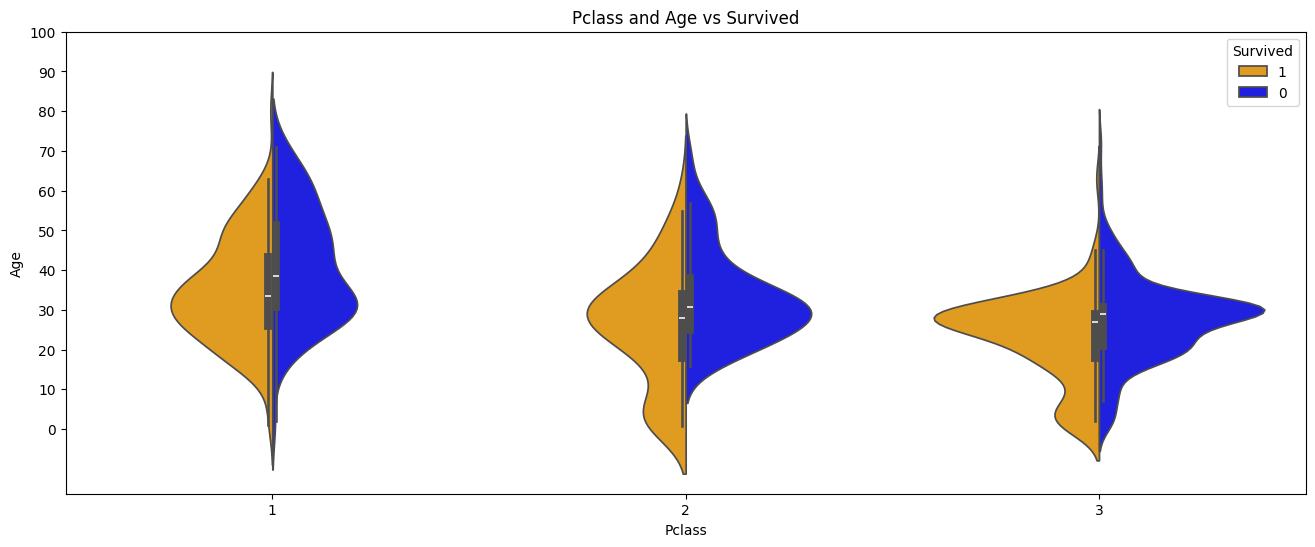

In [1054]:
f, ax = plt.subplots(figsize=(16, 6))

sns.violinplot(x="Pclass", y="Age", hue="Survived", data=df, split=True, ax=ax, palette={'0': 'blue', '1': 'orange'})

ax.set_title('Pclass and Age vs Survived')
ax.set_yticks(range(0, 110, 10))

plt.show()

This code creates a violin plot to visualize the relationship between 'Sex', 'Age', and 'Survived' in the DataFrame 'df'. The plot is split by 'Survived' values and colored differently for each survival category. It helps in understanding the distribution of ages across different genders and their survival outcomes.

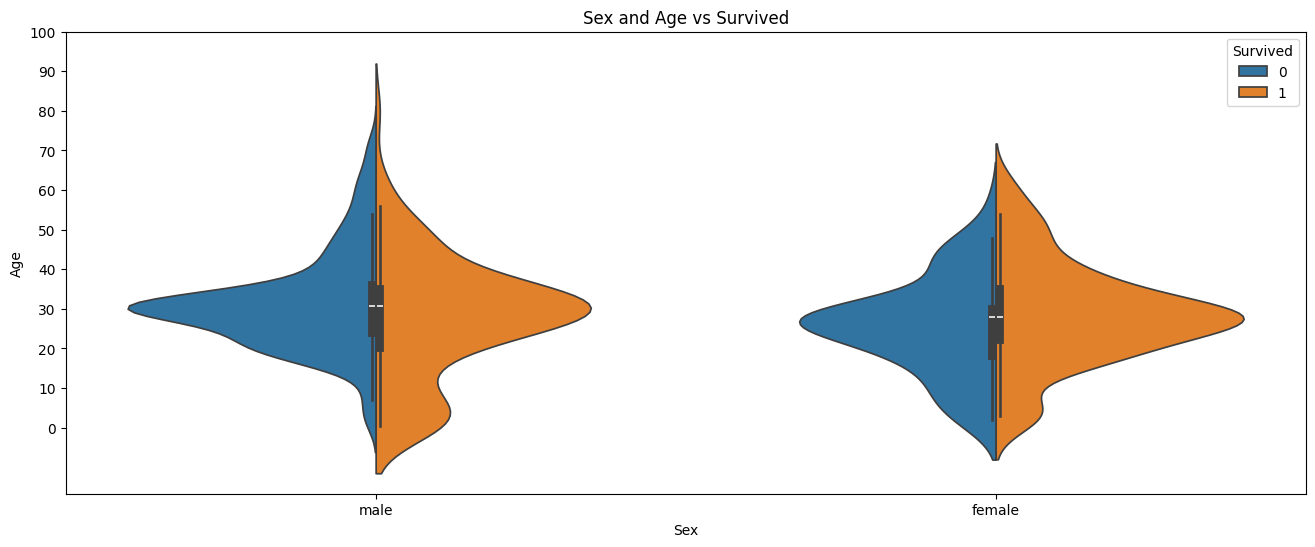

In [1055]:
f, ax = plt.subplots(figsize=(16, 6))
sns.violinplot(x="Sex", y="Age", hue="Survived", data=df, split=True, ax=ax)

ax.set_title('Sex and Age vs Survived')  # setting the title of the plot
ax.set_yticks(range(0, 110, 10))

plt.show()

This code creates a bar plot to visualize the relationship between 'Embarked' and 'Survived' in the DataFrame 'df'. The bars represent the mean survival rate for each 'Embarked' category. The custom colors are defined in the 'custom_palette' dictionary, where 'C' is represented by blue, 'Q' by green, and 'S' by orange.

/var/folders/9w/090_7gb54d54ppm4sfqk8xgr0000gn/T/ipykernel_78992/74721418.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Embarked', y='Survived', data=df, palette=custom_palette)


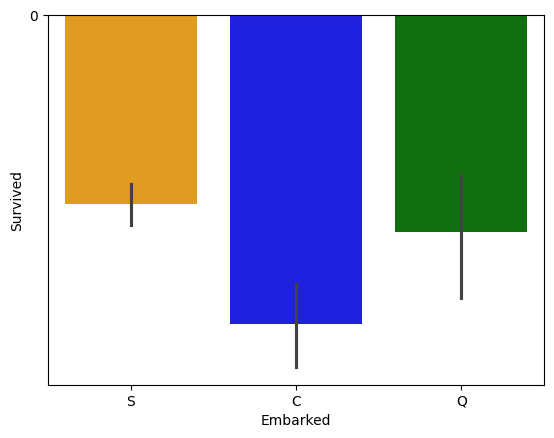

In [1056]:
custom_palette = {'C': 'blue', 'Q': 'green', 'S': 'orange'}  # Customize the colors for each 'Embarked' value

sns.barplot(x='Embarked', y='Survived', data=df, palette=custom_palette)
plt.show()

This code utilizes Seaborn's FacetGrid to create a set of small multiple plots, each corresponding to a different value of 'Embarked'. Within each subplot, a point plot is generated using 'Pclass' on the x-axis, 'Survived' on the y-axis, and differentiating between 'Sex' categories using color. The legend is then added to indicate the color coding.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarnin

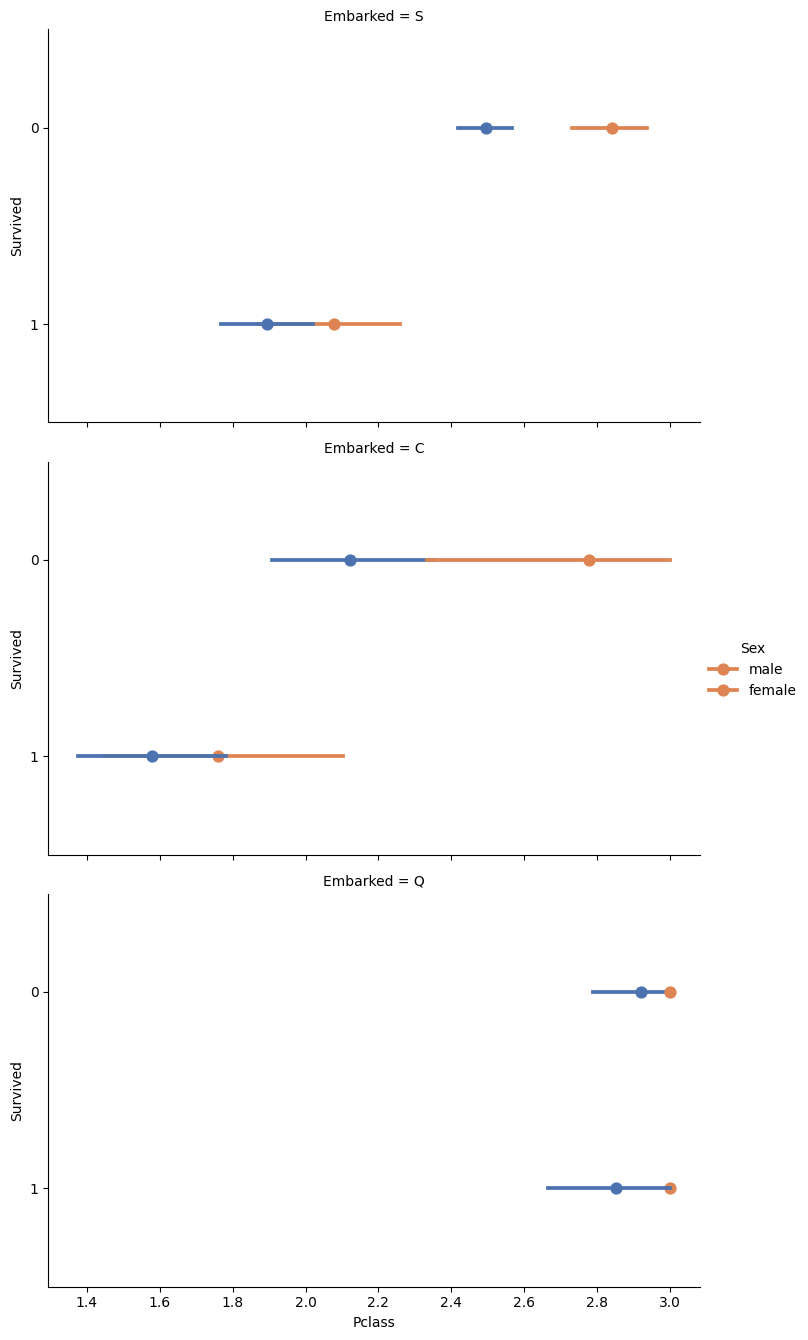

In [1057]:
FacetGrid = sns.FacetGrid(df, row='Embarked', hue='Sex', height=4.5, aspect=1.6)

FacetGrid.map(sns.pointplot, 'Pclass', 'Survived', palette='deep')
FacetGrid.add_legend()

plt.show()

This Seaborn bar plot visualizes the relationship between 'Pclass' and 'Survived', with the bars differentiated by 'Sex'. The x-axis represents the 'Pclass', the y-axis represents the 'Survived' proportion, and the bars are further colored by 'Sex'.

<Axes: xlabel='Pclass', ylabel='Survived'>

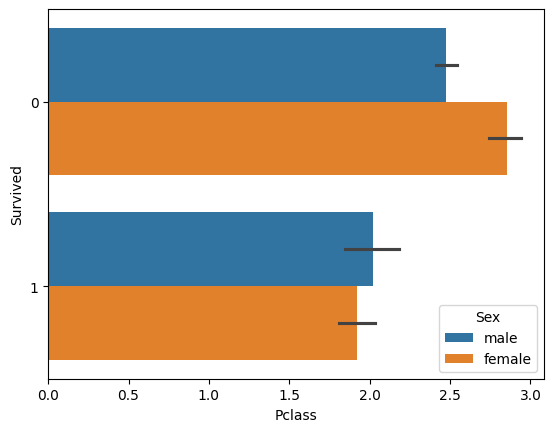

In [1058]:
sns.barplot(x='Pclass', y='Survived',hue='Sex',data=df)

This Seaborn FacetGrid creates a grid of histograms, where each subplot corresponds to a combination of 'Survived' and 'Pclass'. The histograms display the distribution of 'Age', and the transparency (alpha) is set to 0.5 to show overlapping areas. The legend is added to indicate the mapping of colors to the 'Survived' variable.

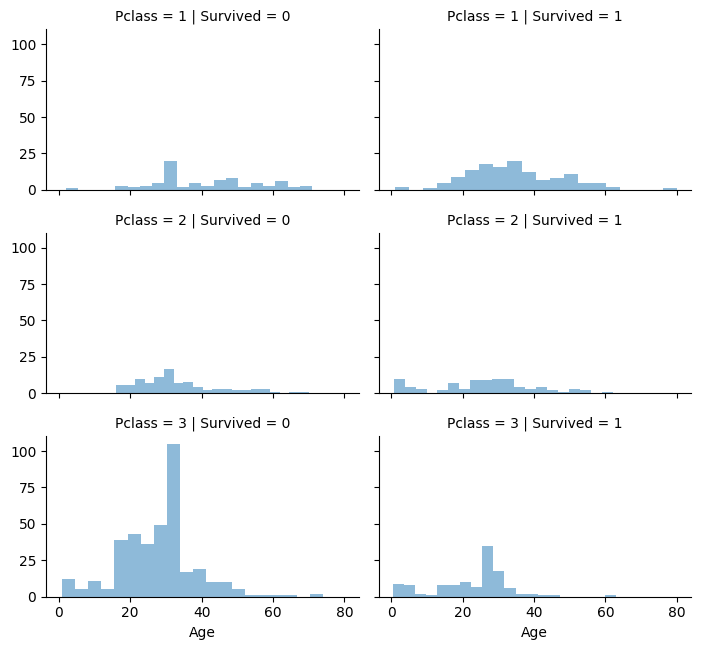

In [1059]:
grid = sns.FacetGrid(df, col='Survived', row='Pclass', height=2.2, aspect=1.6)

grid.map(plt.hist, 'Age', alpha=.5, bins=20)

grid.add_legend()
plt.show()

This code creates a side-by-side barplot with two subplots. The first subplot (saxis[0]) shows the relationship between 'Embarked' and 'Survived', while the second subplot (saxis[1]) shows the relationship between 'Pclass' and 'Survived' with a specified order for the classes (1, 2, 3).

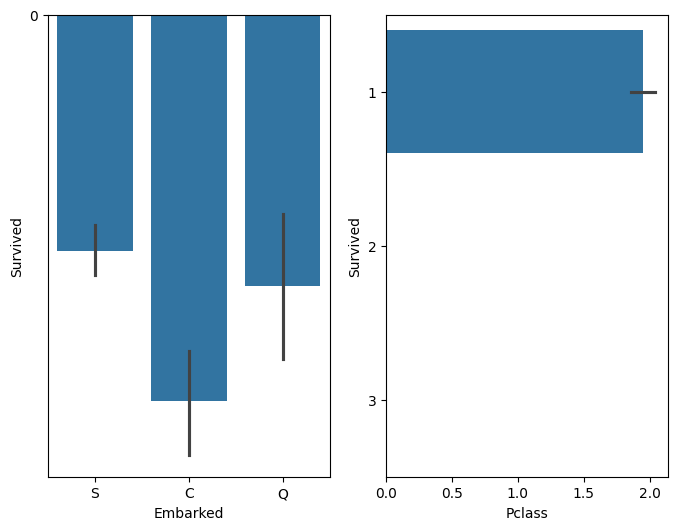

In [1060]:
fig, saxis = plt.subplots(1, 2, figsize=(8, 6))

sns.barplot(x='Embarked', y='Survived', data=df, ax=saxis[0])
sns.barplot(x='Pclass', y='Survived', order=[1, 2, 3], data=df, ax=saxis[1])

plt.show()

This code creates a side-by-side subplot with two visualizations. The first subplot (axis1) displays a boxplot showing the relationship between 'Pclass' and 'Fare' with different colors for 'Survived' categories. The second subplot (axis2) shows a violin plot illustrating the relationship between 'Pclass', 'Age', and 'Survived'.

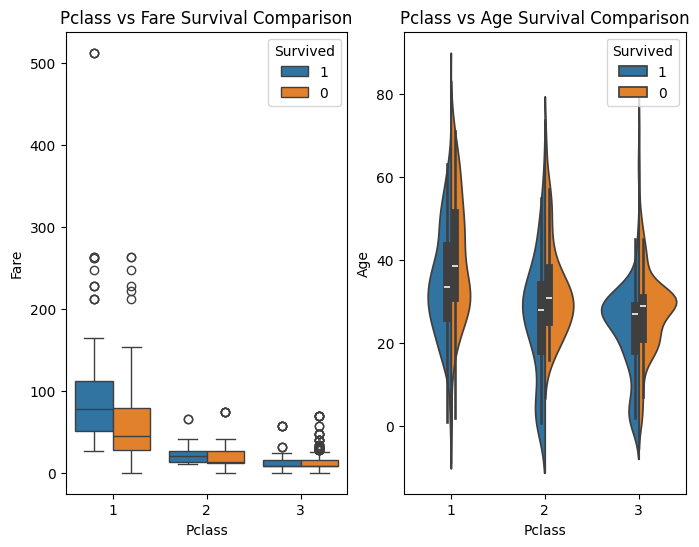

In [1061]:
fig, (axis1, axis2) = plt.subplots(1, 2, figsize=(8, 6))

sns.boxplot(x='Pclass', y='Fare', hue='Survived', data=df, ax=axis1)
axis1.set_title('Pclass vs Fare Survival Comparison')

sns.violinplot(x='Pclass', y='Age', hue='Survived', data=df, split=True, ax=axis2)
axis2.set_title('Pclass vs Age Survival Comparison')

plt.show()

This code creates a side-by-side subplot with two bar plots. The first subplot (qaxis[0]) displays a bar plot showing the relationship between 'Sex', 'Survived', and 'Embarked'. The second subplot (qaxis[1]) illustrates the relationship between 'Sex', 'Survived', and 'Pclass'. Different colors represent the 'Embarked' and 'Pclass' categories, respectively.

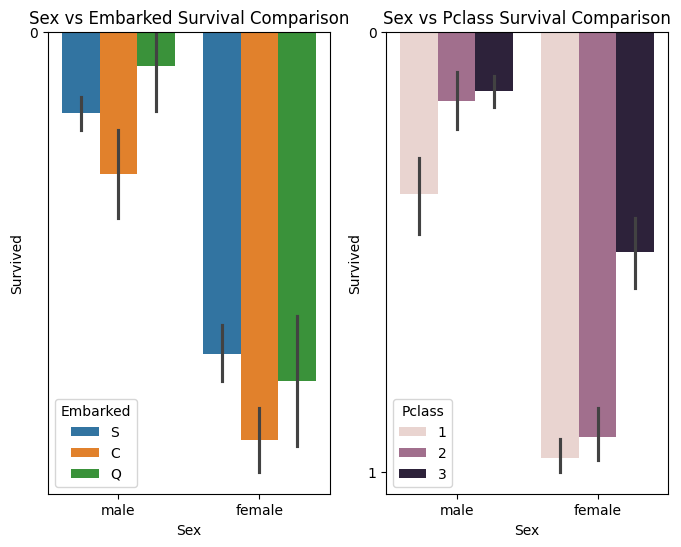

In [1062]:
fig, qaxis = plt.subplots(1, 2, figsize=(8, 6))

sns.barplot(x='Sex', y='Survived', hue='Embarked', data=df, ax=qaxis[0])
qaxis[0].set_title('Sex vs Embarked Survival Comparison')

sns.barplot(x='Sex', y='Survived', hue='Pclass', data=df, ax=qaxis[1])
qaxis[1].set_title('Sex vs Pclass Survival Comparison')


plt.show()

This code generates a point plot (maxis2) to visualize the relationship between 'Pclass', 'Survived', and 'Sex'. The plot uses different markers and linestyles to distinguish between male and female categories.

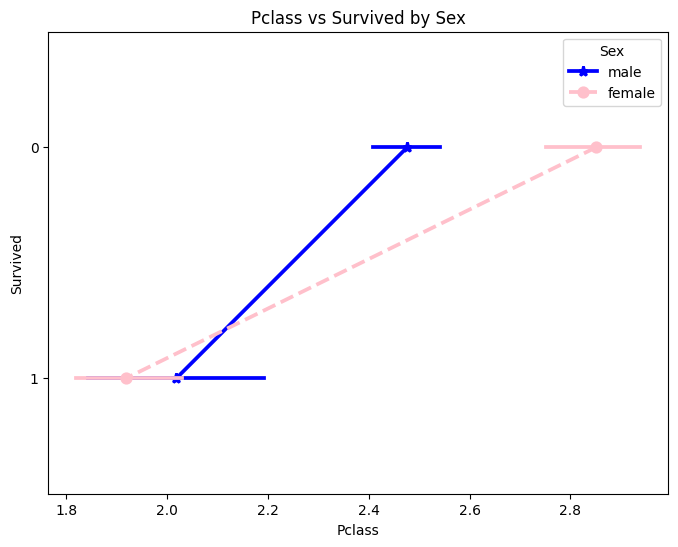

In [1063]:
fig, maxis2 = plt.subplots(figsize=(8, 6))

sns.pointplot(x="Pclass", y="Survived", hue="Sex", data=df,
              palette={"male": "blue", "female": "pink"},
              markers=["*", "o"], linestyles=["-", "--"], ax=maxis2)

maxis2.set_title('Pclass vs Survived by Sex')

plt.show()


This code creates a FacetGrid (e) with columns based on the 'Embarked' values. It then maps a point plot using sns.pointplot to show the relationship between 'Pclass', 'Survived', and 'Sex' within each 'Embarked' category. The confidence interval is set to 95%, and a deep color palette is used.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:718: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:723: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95.0)` for the same effect.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/V

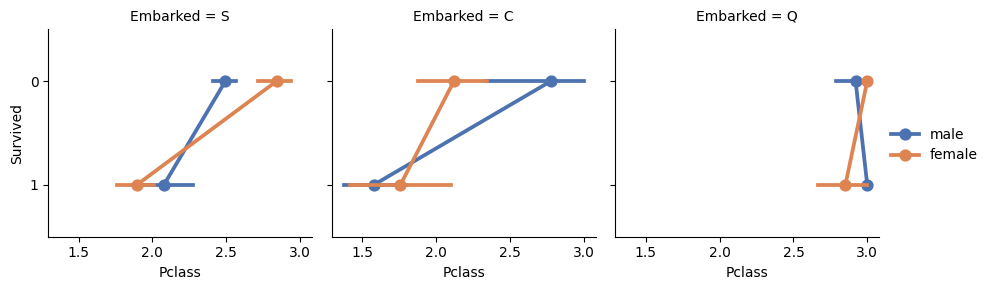

In [1064]:
e = sns.FacetGrid(df, col = 'Embarked')
e.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', ci=95.0, palette = 'deep')
e.add_legend()


This code creates a FacetGrid (a) with a hue based on the 'Survived' column. It then maps a kernel density plot (sns.kdeplot) for the 'Age' variable, with shading to emphasize areas under the curve. The x-axis limit is set from 0 to the maximum age in the dataset, and a legend is added to distinguish between the 'Survived' values. The aspect parameter controls the aspect ratio of each facet in the grid.

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/seaborn/axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


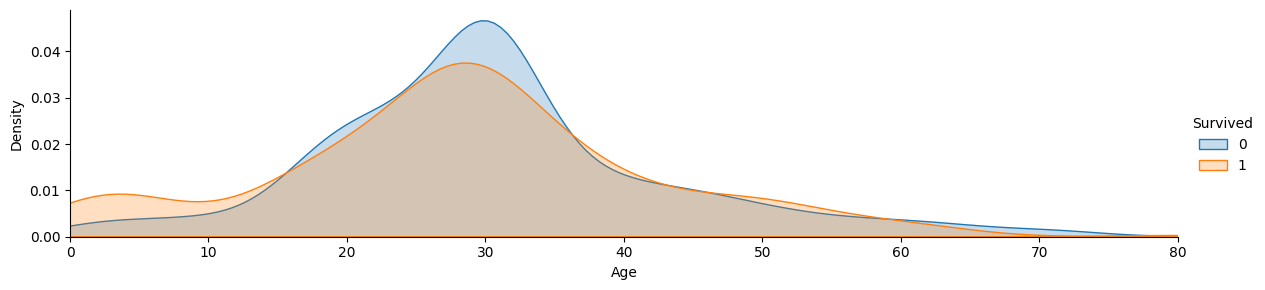

In [1065]:
a = sns.FacetGrid( df, hue = 'Survived', aspect=4 )
a.map(sns.kdeplot, 'Age', shade= True )
a.set(xlim=(0 , df['Age'].max()))
a.add_legend()


This code generates a 2x2 grid of plots to visualize the distribution of the 'Age' and 'Fare' features. The top row shows the distribution of these features based on the 'Survived' class ('Not Survived' and 'Survived'). The bottom row displays the overall distribution of these features for both the training and test sets. Different colors are used to distinguish between survival classes and datasets.

/var/folders/9w/090_7gb54d54ppm4sfqk8xgr0000gn/T/ipykernel_78992/3513491295.py:9: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i])
/var/folders/9w/090_7gb54d54ppm4sfqk8xgr0000gn/T/ipykernel_78992/3513491295.py:11: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44

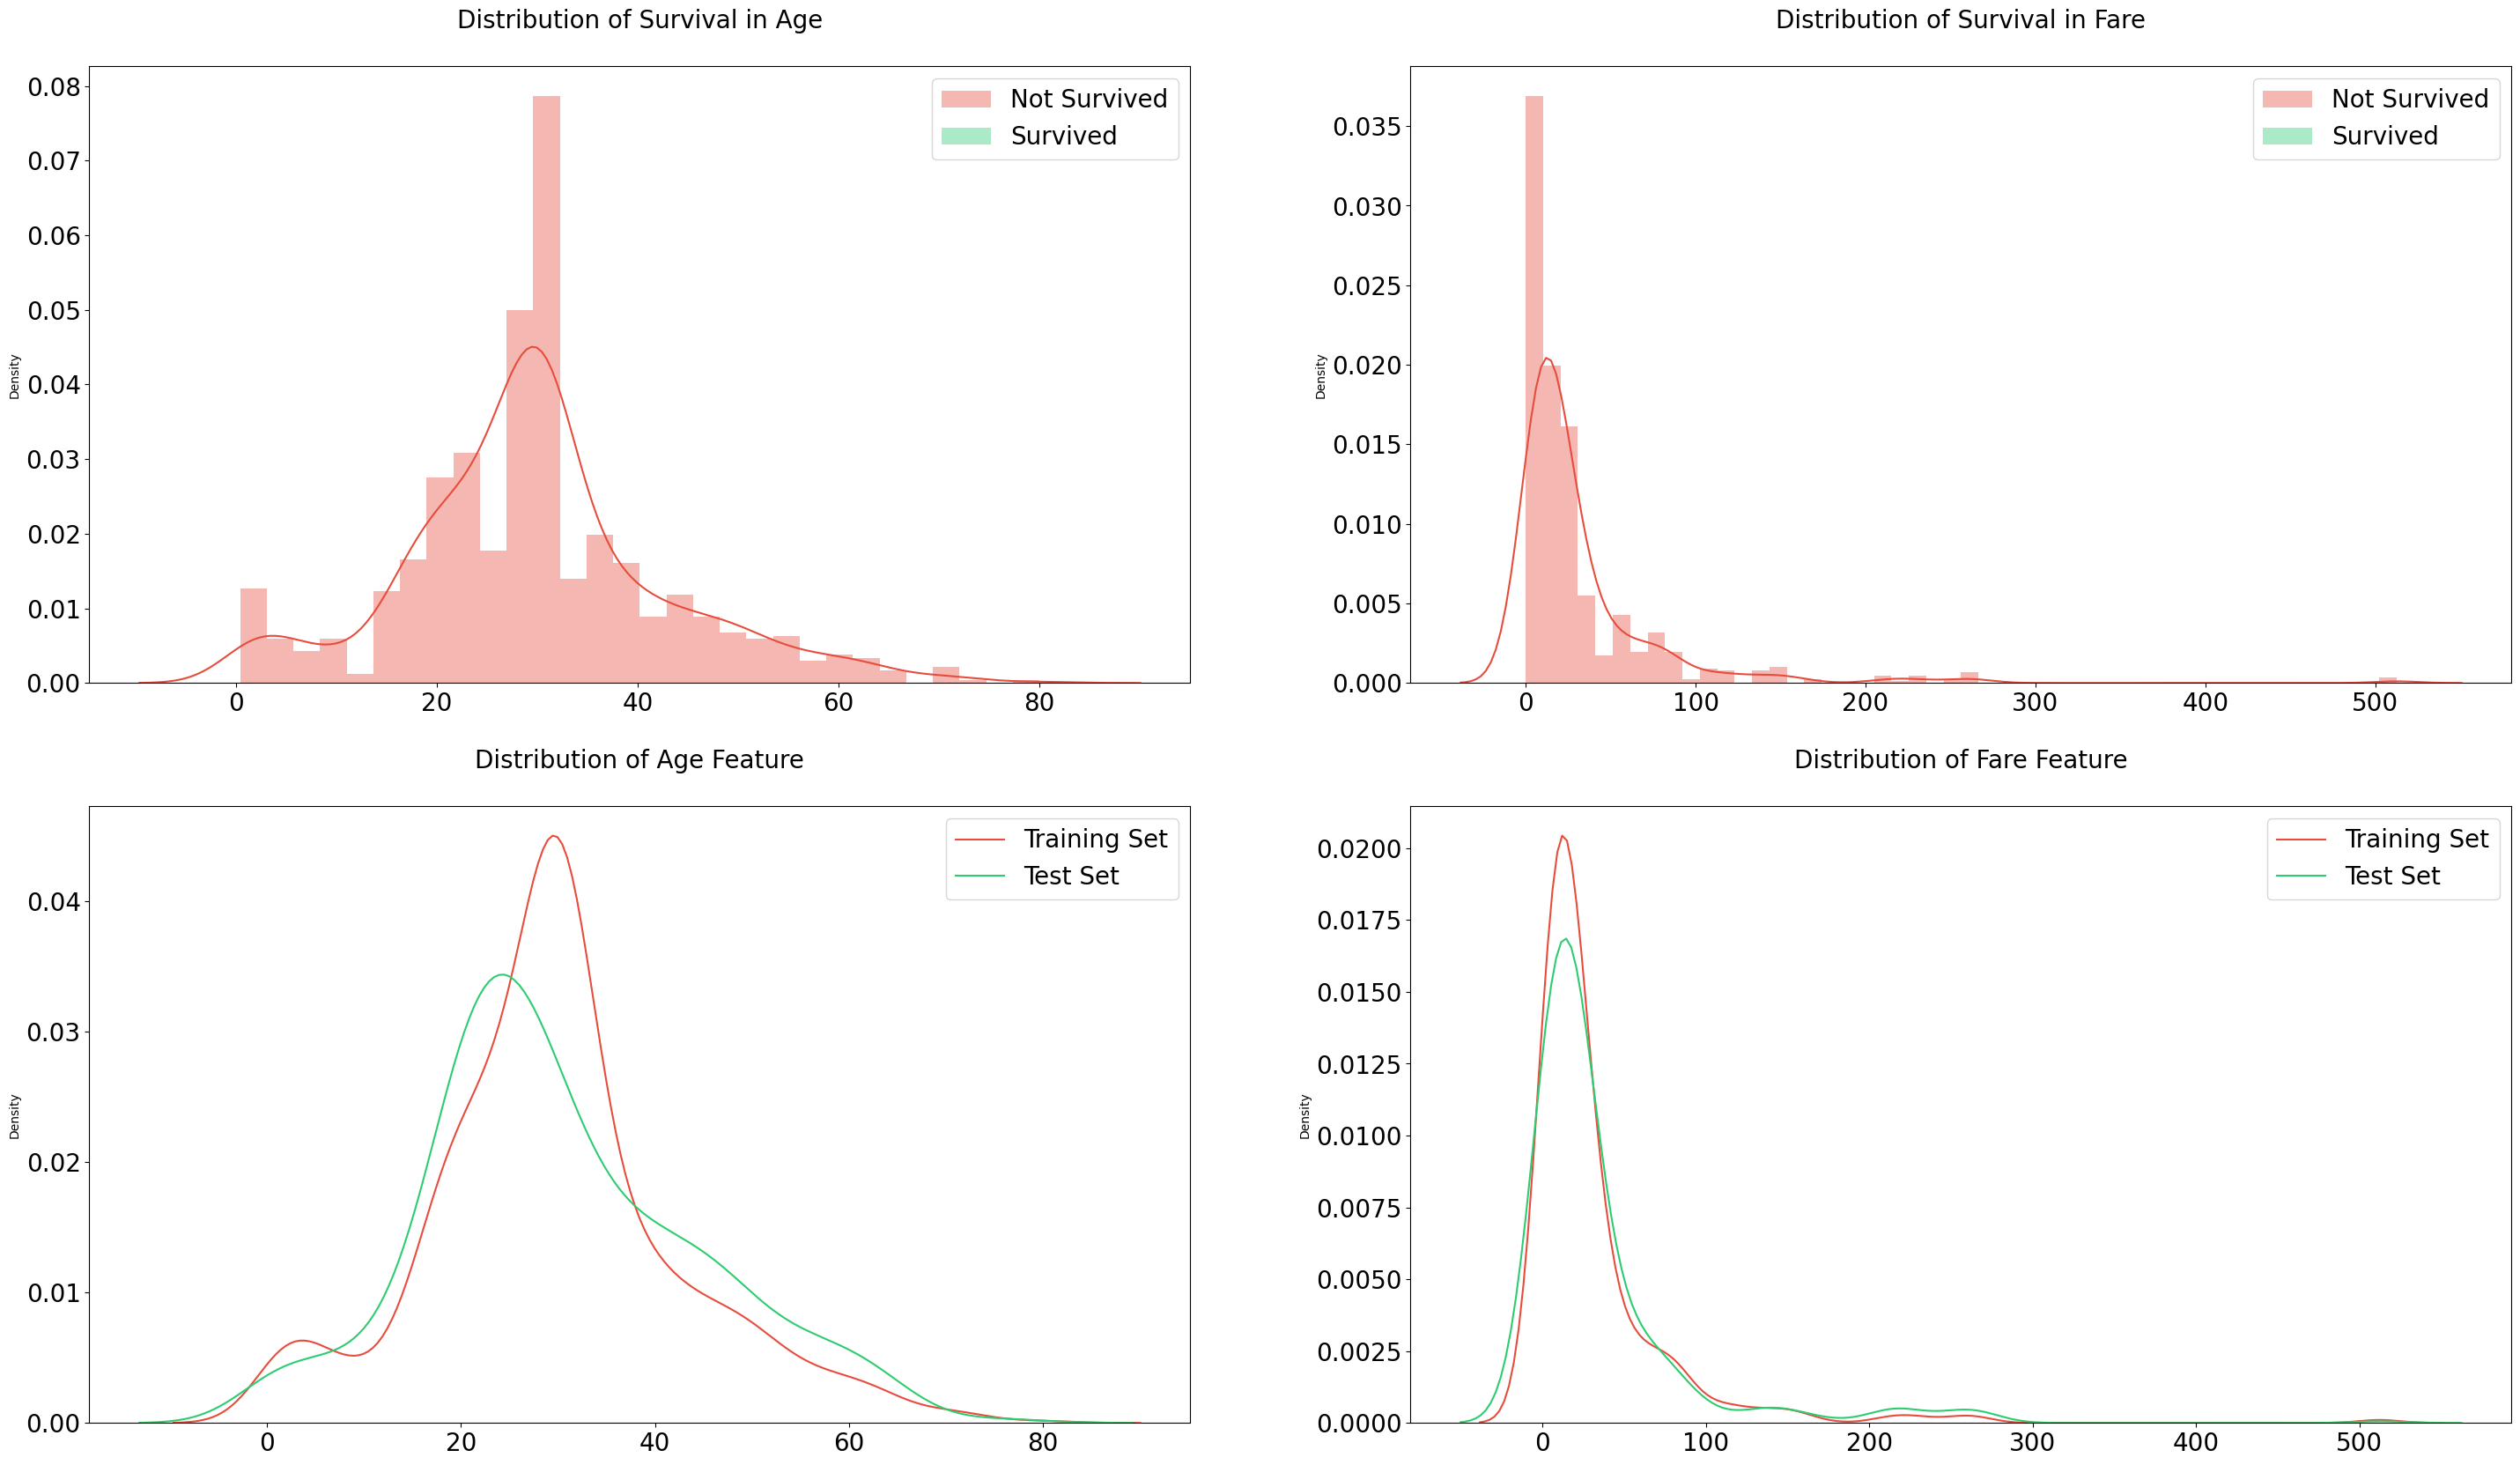

In [1066]:
cont_features = ['Age', 'Fare']
surv = df['Survived'] == 1

fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(20, 20))
plt.subplots_adjust(right=1.5)

for i, feature in enumerate(cont_features):
    # Distribution of survival in feature
    sns.distplot(df[~surv][feature], label='Not Survived', hist=True, color='#e74c3c', ax=axs[0][i]) 
    # [-surv] means "Not Survived"
    sns.distplot(df[surv][feature], label='Survived', hist=True, color='#2ecc71', ax=axs[0][i])

    sns.distplot(df[feature], label='Training Set', hist=False, color='#e74c3c', ax=axs[1][i])
    sns.distplot(df_test[feature], label='Test Set', hist=False, color='#2ecc71', ax=axs[1][i])
    
    axs[0][i].set_xlabel('')
    axs[1][i].set_xlabel('')
     
    # just providing the ticks for x & y axis in respective plots    
    for j in range(2):        
        axs[i][j].tick_params(axis='x', labelsize=20)
        axs[i][j].tick_params(axis='y', labelsize=20)
    
    axs[0][i].legend(loc='upper right', prop={'size': 20})
    axs[1][i].legend(loc='upper right', prop={'size': 20})
    axs[0][i].set_title('Distribution of Survival in {}'.format(feature), size=20, y=1.05)

axs[1][0].set_title('Distribution of {} Feature'.format('Age'), size=20, y=1.05)
axs[1][1].set_title('Distribution of {} Feature'.format('Fare'), size=20, y=1.05)
        
plt.show()

In this code snippet, missing values in the 'Age' column are filled with the median age value within each group defined by the 'Sex' column. Additionally, missing values in the 'Embarked' column are filled with the most frequent (mode) value in the entire 'Embarked' column. The fillna method is used to replace the missing values with the specified values based on the conditions provided.

In [1067]:
df['Age'] = df['Age'].fillna(df.groupby('Sex')['Age'].transform('median'))
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])


This code snippet retrieves the unique values present in the 'Age' column of the DataFrame 'df', showing the different ages recorded in the dataset.

In [1068]:
df['Age'].unique()

array([22.        , 38.        , 26.        , 35.        , 30.72664459,
       54.        ,  2.        , 27.        , 14.        ,  4.        ,
       58.        , 20.        , 39.        , 55.        , 31.        ,
       27.91570881, 34.        , 15.        , 28.        ,  8.        ,
       19.        , 40.        , 66.        , 42.        , 21.        ,
       18.        ,  3.        ,  7.        , 49.        , 29.        ,
       65.        , 28.5       ,  5.        , 11.        , 45.        ,
       17.        , 32.        , 16.        , 25.        ,  0.83      ,
       30.        , 33.        , 23.        , 24.        , 46.        ,
       59.        , 71.        , 37.        , 47.        , 14.5       ,
       70.5       , 32.5       , 12.        ,  9.        , 36.5       ,
       51.        , 55.5       , 40.5       , 44.        ,  1.        ,
       61.        , 56.        , 50.        , 36.        , 45.5       ,
       20.5       , 62.        , 41.        , 52.        , 63.  

This code snippet retrieves the unique values present in the 'Embarked' column of the DataFrame 'df', showing the different ports of embarkation recorded in the dataset.

In [1069]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)


This code uses the LabelEncoder from scikit-learn to transform categorical columns ('Embarked', 'Sex', 'Title') into numerical representations. It assigns these numerical representations to new columns ('Embarked_Code', 'Sex_Code', 'Title_Code') in the DataFrame 'df'.

In [1070]:
label_encoder = LabelEncoder()

df['Embarked_Code'] = label_encoder.fit_transform(df['Embarked'])
df['Sex_Code'] = label_encoder.fit_transform(df['Sex'])
df['Title_Code'] = label_encoder.fit_transform(df['Title'])



This code creates two new columns, 'Age_Bin' and 'Fare_Bin', by binning the 'Age' column into discrete intervals specified by 'bin_ranges' and the 'Fare' column into quantiles (tertiles) using pd.cut and pd.qcut, respectively. The resulting bins are assigned numerical labels.

In [1071]:
bin_ranges = [0, 5, 10, 15, 30, 40, 50, 60, 70, 80]  # Adjust the bin ranges as desired
labels = range(1, len(bin_ranges))  # Assign labels 1, 2, 3, 4, 5, and so on
df['Age_Bin'] = pd.cut(df['Age'], bins=bin_ranges, labels=labels).astype(int)

df['Fare_Bin'] = pd.qcut(df['Fare'], q=3, labels=[1, 2, 3]).astype(int)


This code generates histograms for each numerical column in the DataFrame, arranging them in a grid with 3 plots per row. The histograms display the frequency distribution of values in each column.

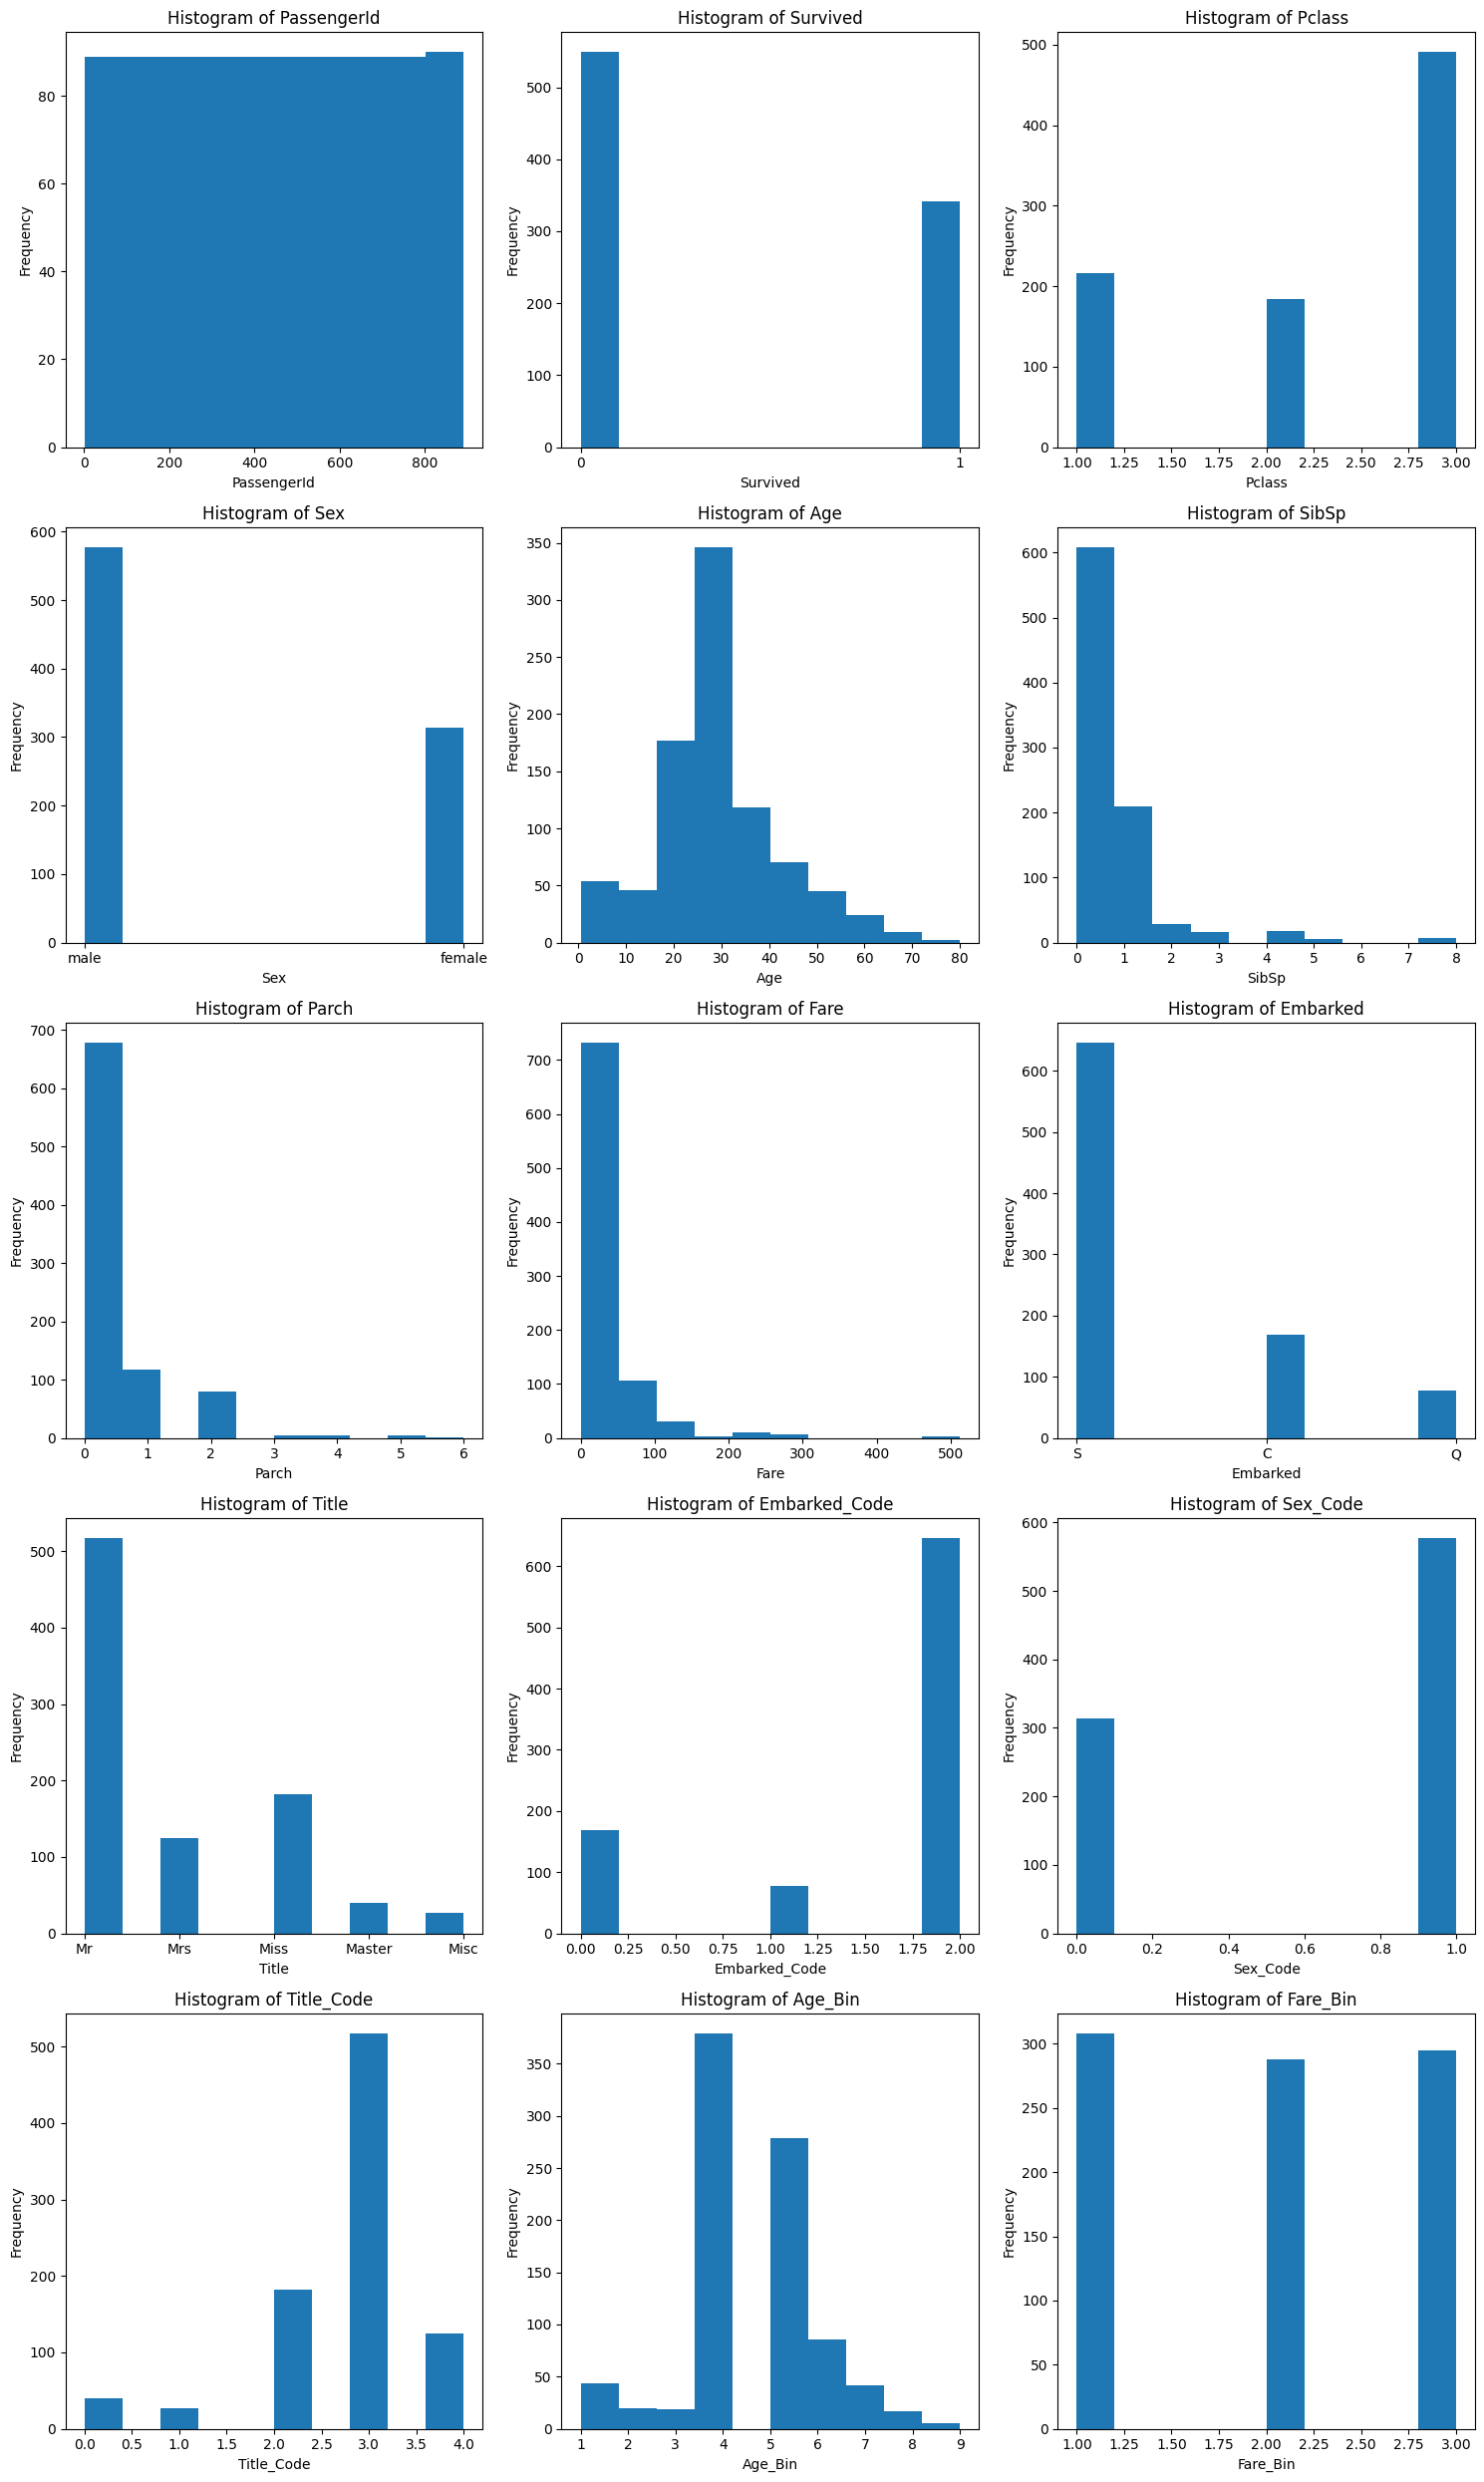

In [1072]:
num_plots = len(df.columns)
num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    df[column].hist(ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Remove empty subplots
if num_plots % 3 != 0:
    for i in range(num_plots, num_rows*3):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
for ax in axes.flatten():
    ax.grid(False)



This code prints the data types of each column in the DataFrame df. It shows whether each column contains numerical values (integers or floats) or categorical values (objects, which can include strings). The output provides information about the data type of each feature in the dataset.

In [1073]:
df.dtypes

PassengerId        int64
Survived          object
Pclass             int64
Sex               object
Age              float64
SibSp              int64
Parch              int64
Fare             float64
Embarked          object
Title             object
Embarked_Code      int64
Sex_Code           int64
Title_Code         int64
Age_Bin            int64
Fare_Bin           int64
dtype: object


These lines of code add two new columns, 'Child' and 'Elder,' to the DataFrame df. The 'Child' column is assigned a value of 1 if the corresponding 'Age' is less than 16, and 0 otherwise. Similarly, the 'Elder' column is assigned a value of 1 if the corresponding 'Age' is greater than 60, and 0 otherwise. This allows for the identification of individuals who are either children or elders based on the specified age criteria.

In [1074]:
df['Child'] = ((df['Age'] < 16)).astype(int)
df['Elder'] = ((df['Age'] > 60)).astype(int)



This code generates histograms for each column in the DataFrame df, with the distribution of each column differentiated by the 'Survived' status. The histograms are arranged in a grid with three columns, and the number of rows is adjusted based on the number of columns in the DataFrame. Each histogram represents the frequency distribution of a specific feature, and the 'Survived' status is distinguished by different colors.

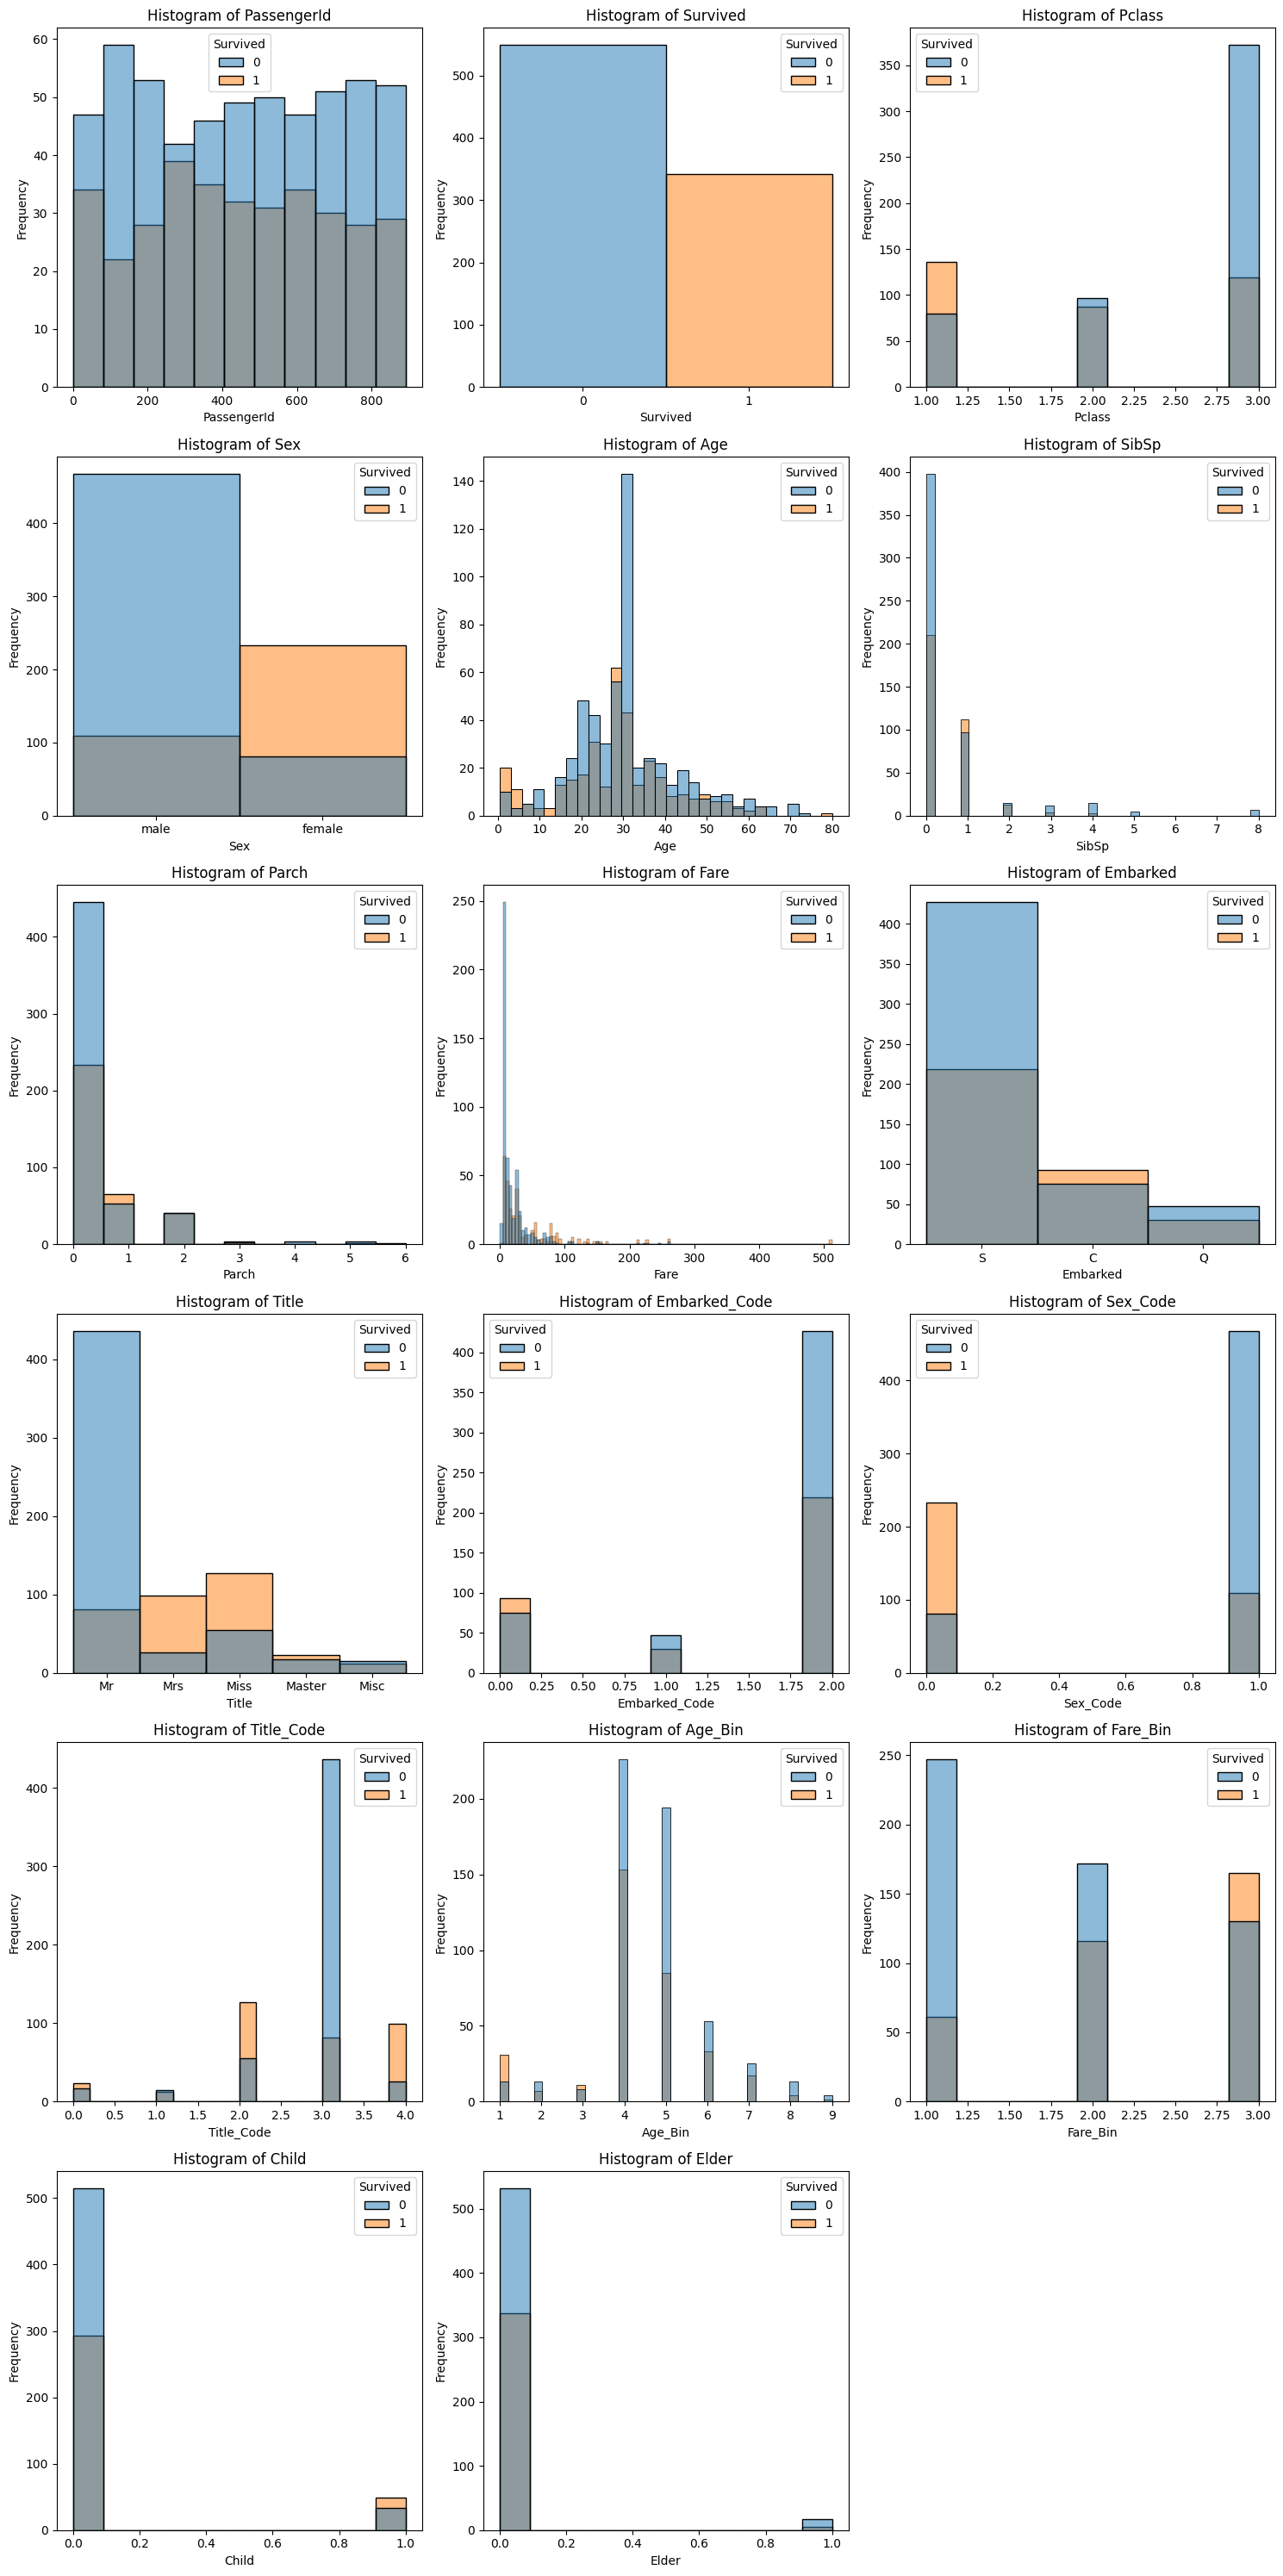

In [1075]:
num_plots = len(df.columns)
num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.histplot(data=df, x=column, hue='Survived', ax=ax)
    ax.set_xlabel(column)
    ax.set_ylabel('Frequency')
    ax.set_title(f'Histogram of {column}')

# Remove empty subplots
if num_plots % 3 != 0:
    for i in range(num_plots, num_rows*3):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
for ax in axes.flatten():
    ax.grid(False)


This code converts the 'Survived' column in the DataFrame df from its current data type to integer. The 'Survived' column likely contains binary values representing survival status (e.g., 0 for not survived, 1 for survived). The astype(int) method is used to ensure that the data type of the column is explicitly changed to integer type.

In [1076]:
df['Survived'] = df['Survived'].astype(int)


This code creates a new DataFrame df_men containing only the rows from the original DataFrame df where the value in the 'Sex' column is 'male'. It filters the DataFrame to include only rows corresponding to male individuals.

In [1077]:
df_men = df[df['Sex']=='male']


This code counts the number of males who survived and did not survive in the DataFrame df_men. It then creates a pie chart to visualize the survival rate among males, using different colors for survived (green) and not survived (red) categories. The chart displays the percentage of males who survived and did not survive.

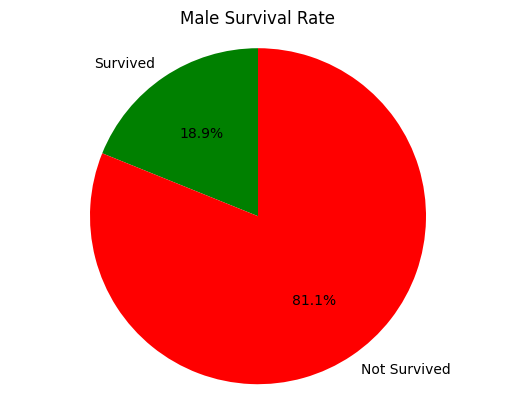

In [1078]:
# Count the number of males who survived and did not survive
male_survived = len(df_men[df_men['Survived'] == 1])
male_not_survived = len(df_men[df_men['Survived'] == 0])

# Create a pie chart
labels = ['Survived', 'Not Survived']
sizes = [male_survived, male_not_survived]
colors = ['green', 'red']
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
plt.axis('equal')
plt.title('Male Survival Rate')
plt.show()


This code calculates the survival percentage for each passenger class (Pclass) and creates three pie charts, one for each class. The charts visualize the distribution of survived and not survived passengers within each class. Green represents the survival category, and red represents the not survived category. The percentage of passengers in each category is displayed on the pie charts.

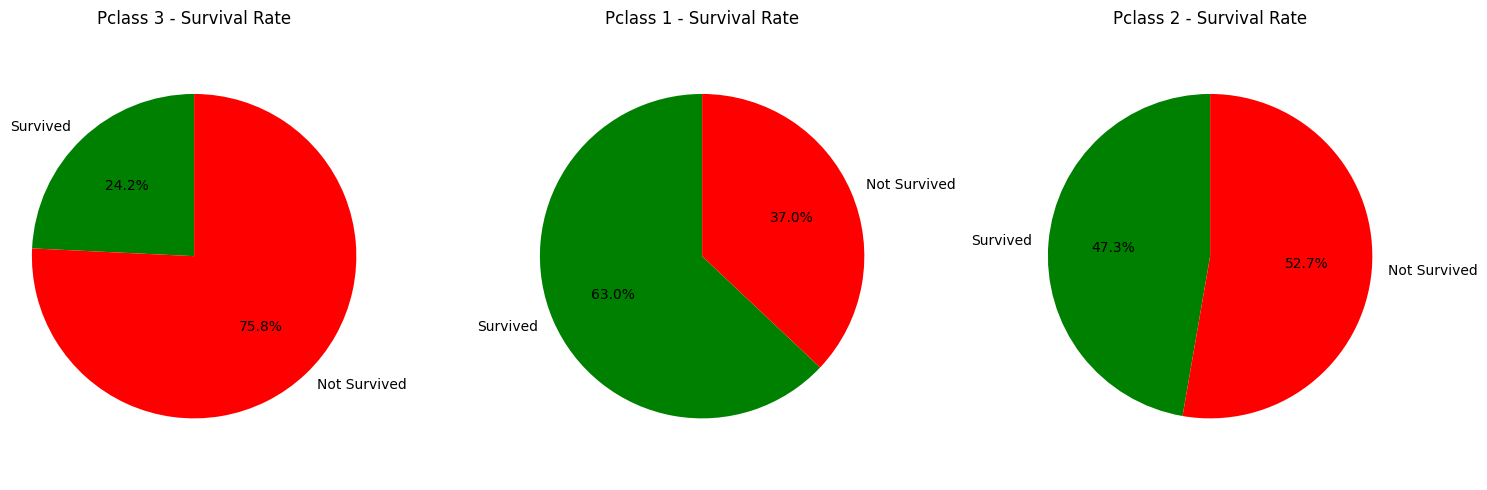

In [1079]:
survived_percentage = df.groupby('Pclass')['Survived'].mean() * 100
not_survived_percentage = 100 - survived_percentage

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, pclass in enumerate(df['Pclass'].unique()):
    labels = ['Survived', 'Not Survived']
    sizes = [survived_percentage[pclass], not_survived_percentage[pclass]]
    colors = ['green', 'red']
    
    ax = axes[i]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Pclass {pclass} - Survival Rate')

plt.tight_layout()
plt.show()



This code calculates and visualizes the survival rates for each unique value in the 'Sex' column. It creates two pie charts, one for each unique value (male and female), showing the percentage of passengers who survived (green) and did not survive (red).

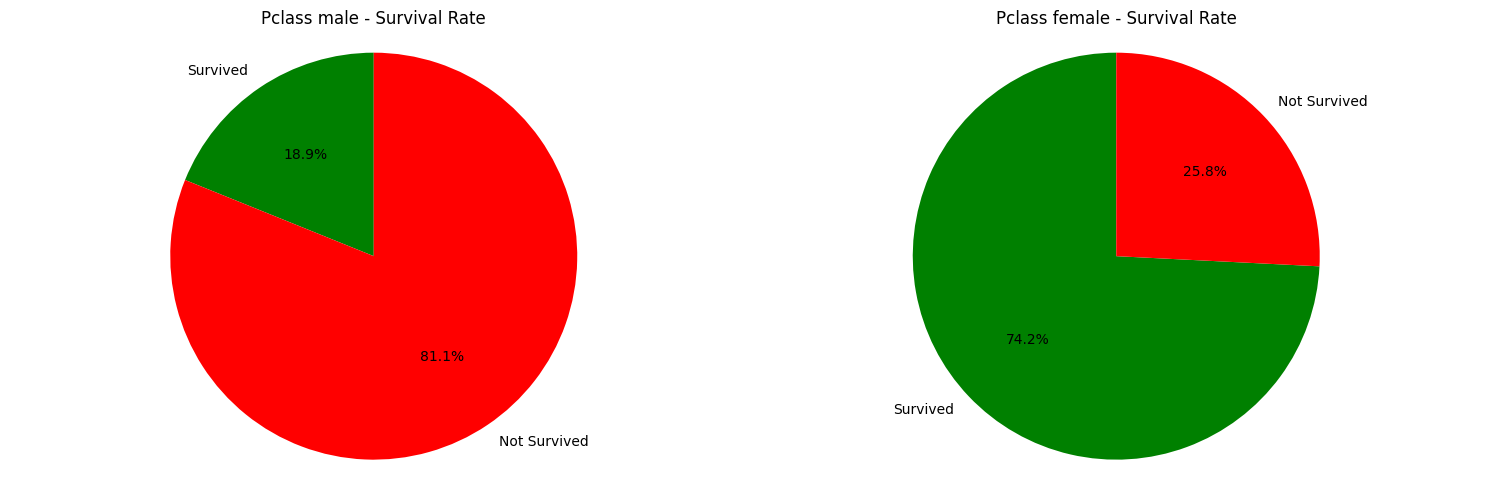

In [1080]:
survived_percentage = df.groupby('Sex')['Survived'].mean() * 100
not_survived_percentage = 100 - survived_percentage


fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Iterate over each Pclass
for i, pclass in enumerate(df['Sex'].unique()):
    labels = ['Survived', 'Not Survived']
    sizes = [survived_percentage[pclass], not_survived_percentage[pclass]]
    colors = ['green', 'red']
    
    ax = axes[i]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Pclass {pclass} - Survival Rate')

plt.tight_layout()
plt.show()


This code calculates and displays the survival rates based on the 'Embarked' column, creating three pie charts corresponding to each unique value in the 'Embarked' column (C, Q, and S). The charts depict the percentage of passengers who survived (green) and did not survive (red) for each embarkation point.

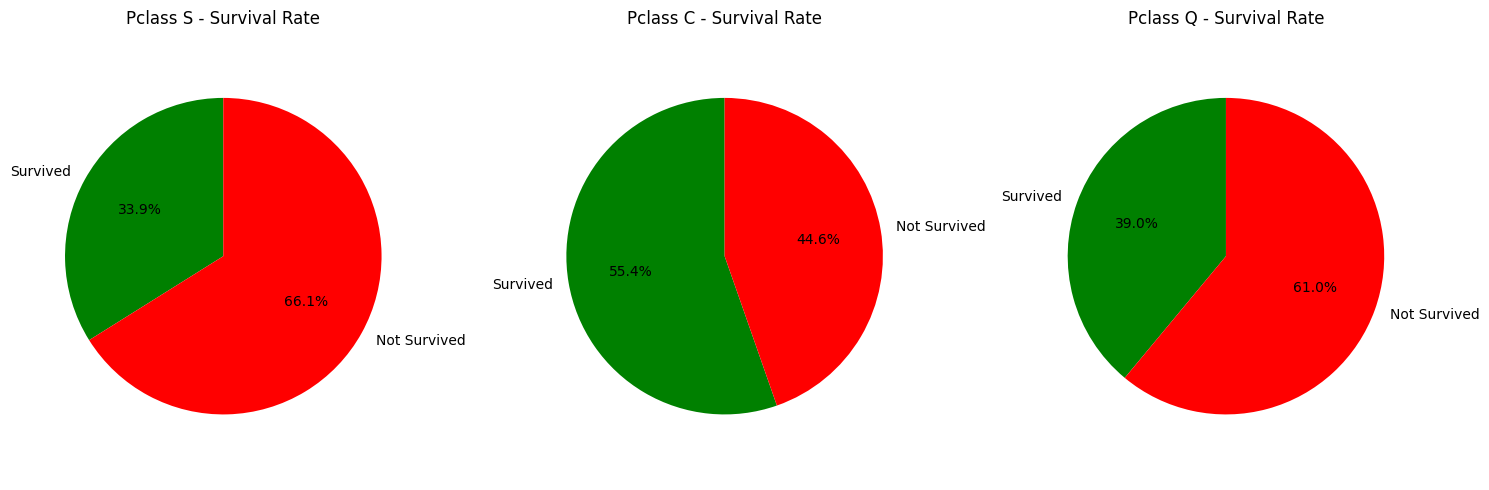

In [1081]:
survived_percentage = df.groupby('Embarked')['Survived'].mean() * 100
not_survived_percentage = 100 - survived_percentage

fig, axes = plt.subplots(1, 3, figsize=(15, 5))

for i, pclass in enumerate(df['Embarked'].unique()):
    labels = ['Survived', 'Not Survived']
    sizes = [survived_percentage[pclass], not_survived_percentage[pclass]]
    colors = ['green', 'red']
    
    ax = axes[i]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Pclass {pclass} - Survival Rate')

plt.tight_layout()
plt.show()


This code retrieves the unique values present in the 'Title' column of the DataFrame 'df', showing the different titles assigned to individuals in the dataset.

In [1082]:
df['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Misc'], dtype=object)


This code creates a subplot grid to display pie charts for the survival rates of different titles. It calculates the survival and non-survival percentages for each unique title in the 'Title' column of the DataFrame 'df' and visualizes the results using pie charts. The charts are arranged in a 2x4 grid, with each chart representing a unique title's survival rate.

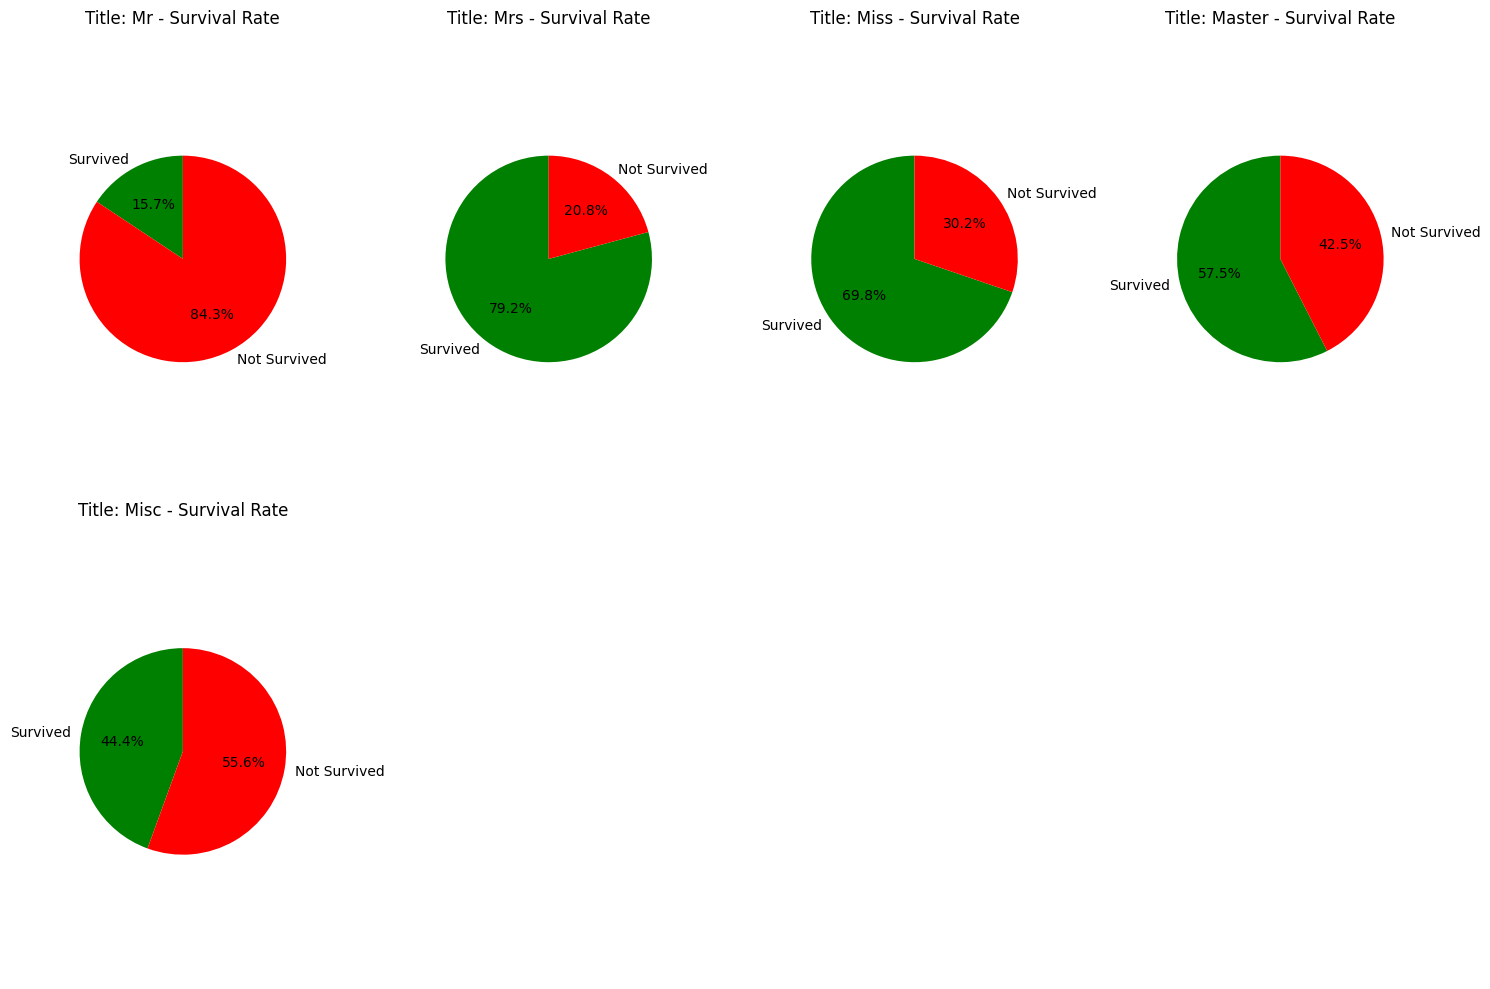

In [1083]:
survived_percentage = df.groupby('Title')['Survived'].mean() * 100
not_survived_percentage = 100 - survived_percentage

fig, axes = plt.subplots(2, 4, figsize=(15, 10))

for i, title in enumerate(df['Title'].unique()):
    row = i // 4
    col = i % 4
    
    labels = ['Survived', 'Not Survived']
    sizes = [survived_percentage[title], not_survived_percentage[title]]
    colors = ['green', 'red']
    
    ax = axes[row, col]
    ax.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    ax.axis('equal')
    ax.set_title(f'Title: {title} - Survival Rate')
    
# Remove empty subplots
if len(df['Title'].unique()) < 8:
    for i in range(len(df['Title'].unique()), 8):
        fig.delaxes(axes[1, i % 4])

plt.tight_layout()



This code generates a scatterplot grid to visualize the relationship between the 'Age' column and other columns in the DataFrame 'df'. Each scatterplot is colored based on the survival status ('Survived' column), and the charts are arranged in a grid. The x-axis is fixed as 'Age', and the y-axis represents different columns in the dataset.

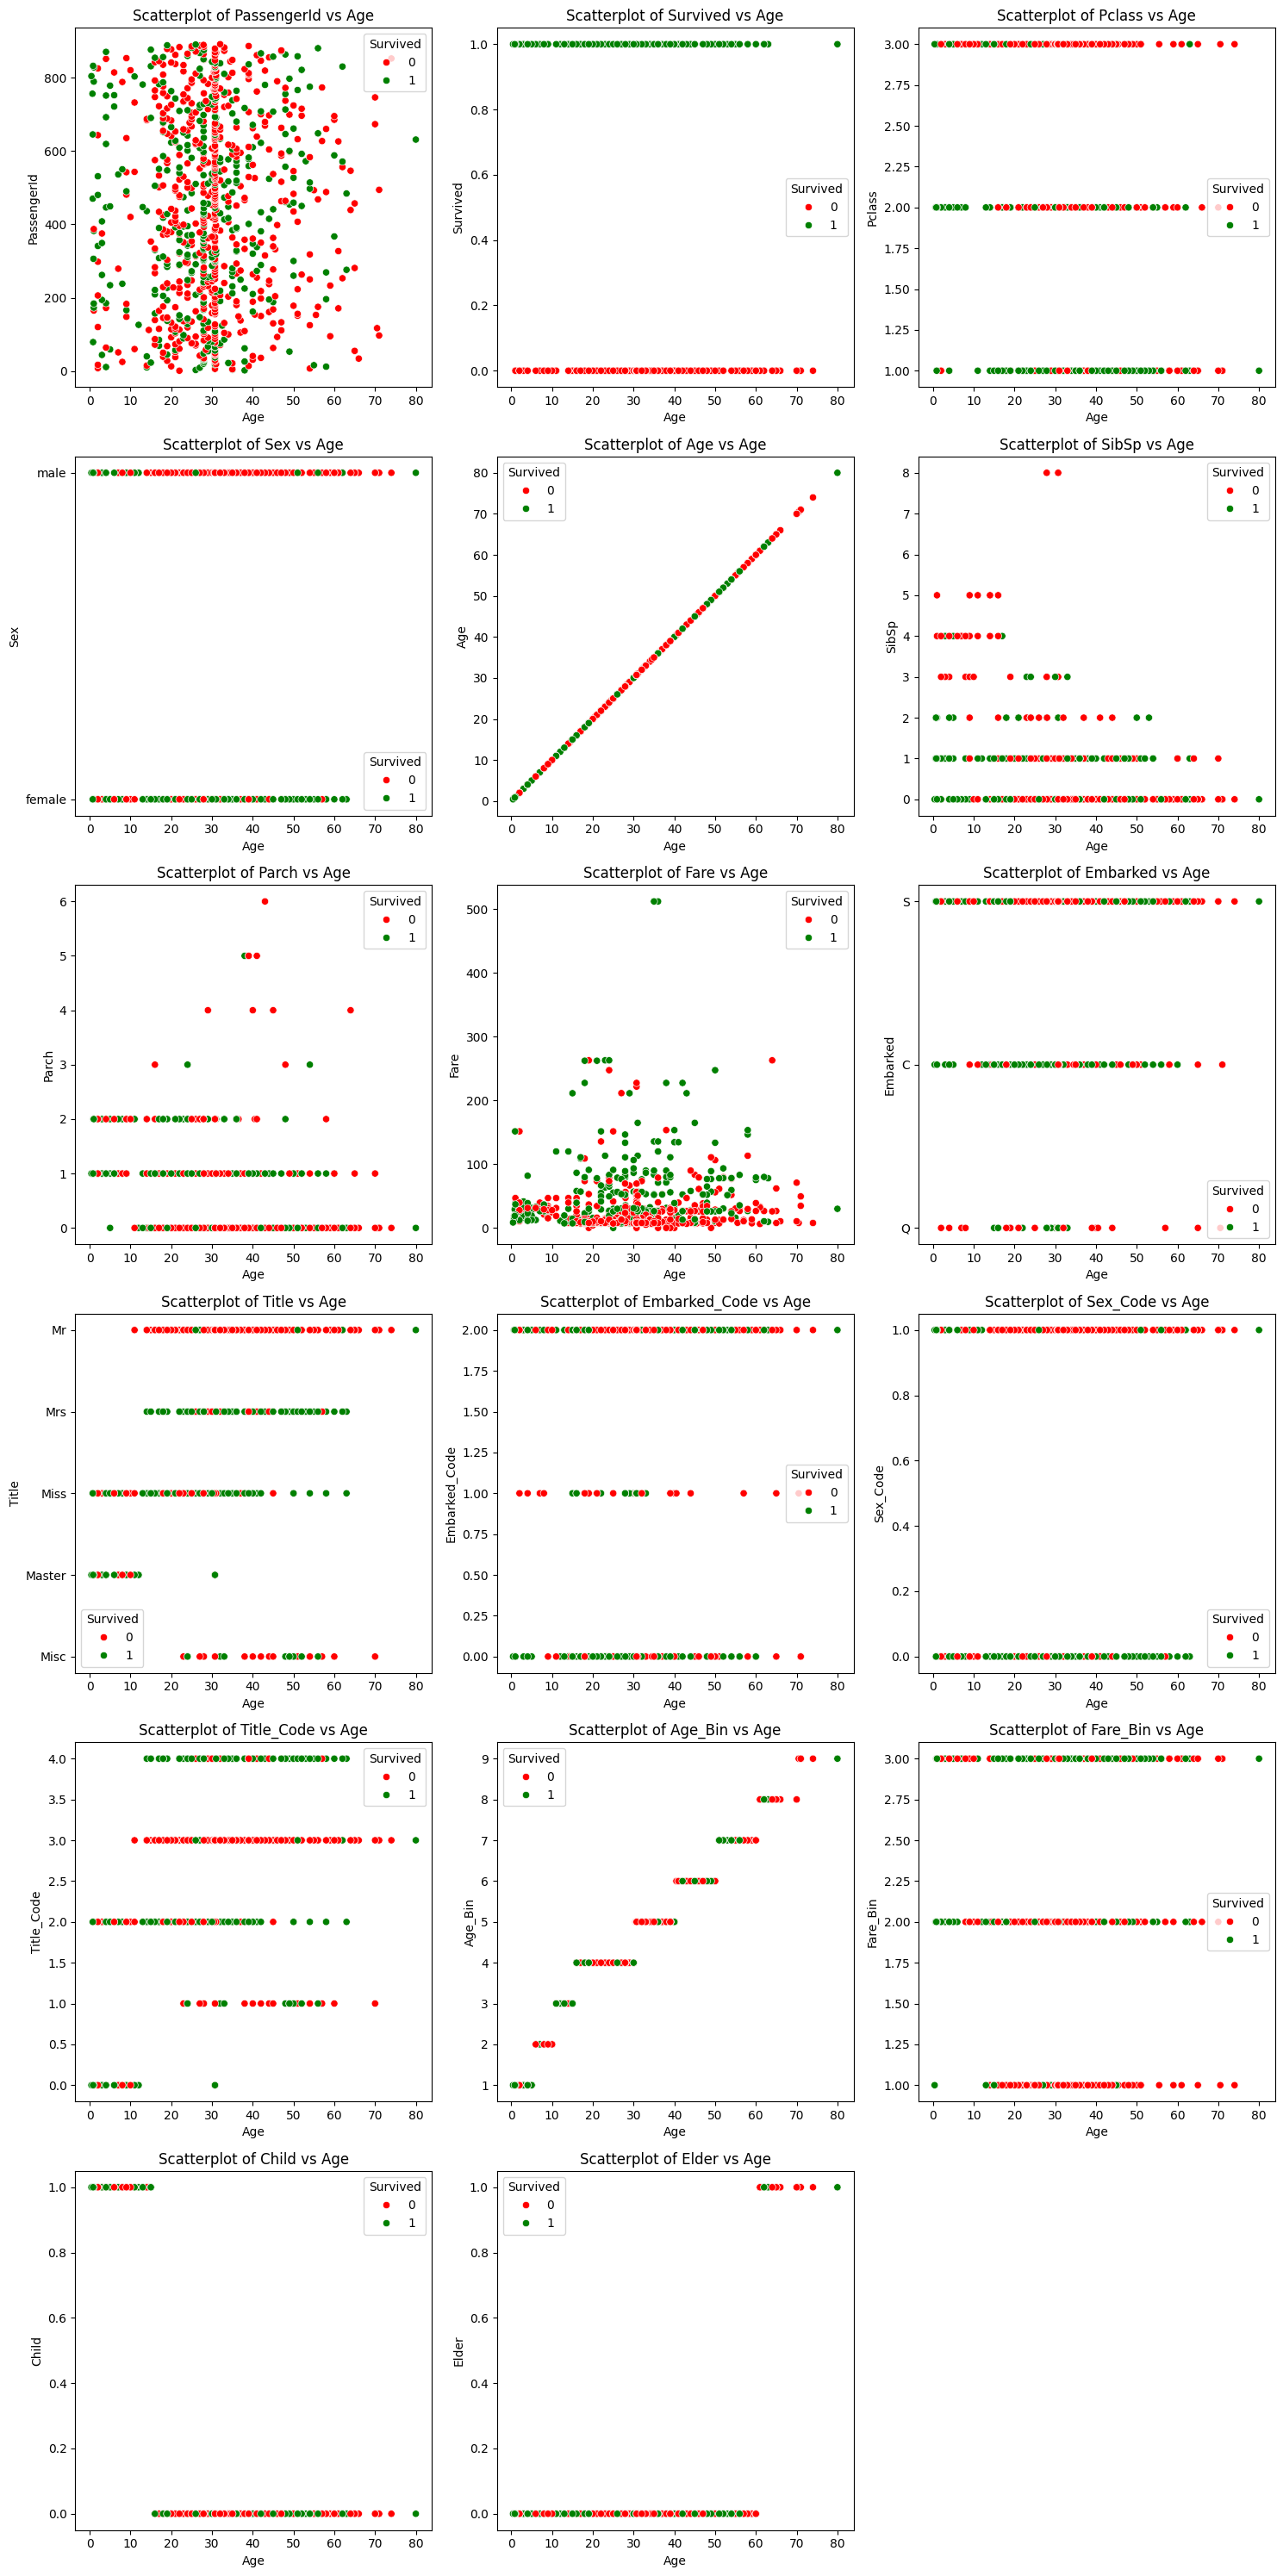

In [1084]:
num_plots = len(df.columns)
num_rows = (num_plots + 2) // 3
fig, axes = plt.subplots(num_rows, 3, figsize=(15, 5*num_rows))

for i, column in enumerate(df.columns):
    row = i // 3
    col = i % 3
    ax = axes[row, col]
    sns.scatterplot(data=df, x='Age', y=column, hue='Survived', palette=['red', 'green'], ax=ax)
    ax.set_xlabel('Age')
    ax.set_ylabel(column)
    ax.set_title(f'Scatterplot of {column} vs Age')

# Remove empty subplots
if num_plots % 3 != 0:
    for i in range(num_plots, num_rows*3):
        fig.delaxes(axes[i // 3, i % 3])

plt.tight_layout()
for ax in axes.flatten():
    ax.grid(False)



This code creates separate DataFrames, namely 'df_men' for males, 'df_women' for females, 'df_child' for individuals identified as children, and 'df_Elder' for those identified as elderly, based on conditions specified for the 'Sex', 'Child', and 'Elder' columns in the original DataFrame 'df'.

In [1085]:
df_men = df[df['Sex']== 'male']
df_women = df[df['Sex']== 'female']
df_child = df[df['Child']== 1]
df_Elder = df[df['Elder']== 1]


This code calculates and prints the death rates for different groups based on gender, age (child or not), and elderly status. The death rates are calculated by dividing the number of individuals who did not survive (where 'Survived' column is 0) by the total number of individuals in each respective group and then multiplying by 100 to get the percentage.






In [1086]:
print("Male Death Rate:", (len(df_men[df_men['Survived'] == 0]) / len(df_men)) * 100)
print("Female Death Rate:", (len(df_women[df_women['Survived'] == 0])/ len(df_women)) * 100)
print("Child Death Rate:", (len(df_child[df_child['Survived'] == 0])/ len(df_child)) * 100)
print("Elder Death Rate:", (len(df_Elder[df_Elder['Survived'] == 0])/ len(df_Elder)) * 100)

Male Death Rate: 81.10918544194108
Female Death Rate: 25.796178343949045
Child Death Rate: 40.963855421686745
Elder Death Rate: 77.27272727272727



This code calculates and plots the death rate per age group. It computes the death rate for each age group by dividing the number of individuals who did not survive (where 'Survived' column is 0) by the total number of individuals in that age group and multiplying by 100 to get the percentage. The moving average is then applied to smooth out fluctuations in the death rate over age, and the results are visualized in a line plot.

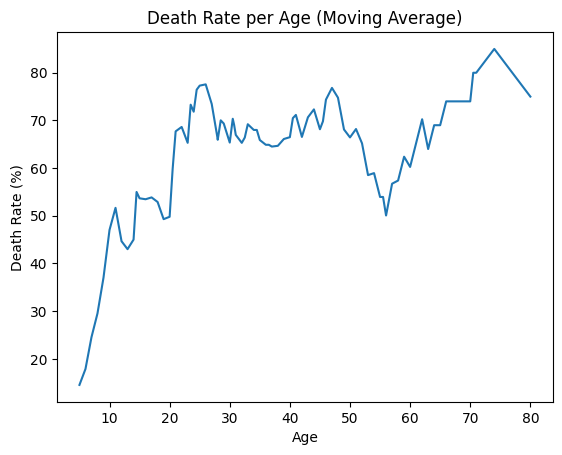

In [1087]:
death_rate_per_age = df.groupby(['Age'])['Survived'].apply(lambda x: (x == 0).sum() / len(x) * 100)

moving_average = death_rate_per_age.rolling(window=10).mean()
plt.plot(death_rate_per_age.index, moving_average)
plt.xlabel('Age')
plt.ylabel('Death Rate (%)')
plt.title('Death Rate per Age (Moving Average)')
plt.show()



This code uses Seaborn to create a bar plot that displays the survival rate based on the 'Pclass' (Passenger Class) with a different color for each 'Sex' category. The x-axis represents the passenger class, the y-axis represents the survival rate, and the bars are distinguished by different colors for male and female passengers.

<Axes: xlabel='Pclass', ylabel='Survived'>

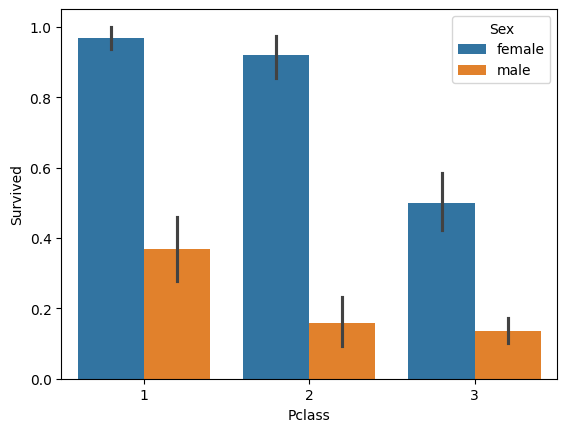

In [1088]:
sns.barplot(data=df, x='Pclass', y='Survived',hue='Sex')



This code utilizes Seaborn to generate a bar plot illustrating the survival rate based on the 'Parch' (number of parents/children aboard) with different colors representing each 'Sex' category. The x-axis represents the number of parents/children aboard, the y-axis represents the survival rate, and the bars are distinguished by different colors for male and female passengers.

<Axes: xlabel='Parch', ylabel='Survived'>

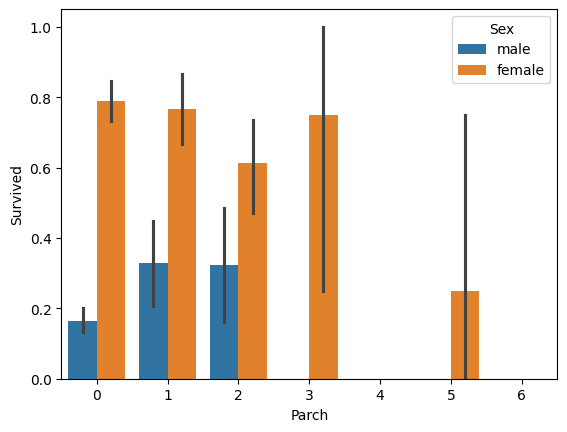

In [1089]:
sns.barplot(data=df, x='Parch', y='Survived',hue='Sex')


This code creates a new column 'Fam_Size' in the DataFrame 'df' by adding the values from the 'SibSp' column (number of siblings/spouses aboard), the 'Parch' column (number of parents/children aboard), and 1. This column represents the total family size of each passenger.

In [1090]:
df['Fam_Size'] = df['SibSp'] + df['Parch'] + 1


This code generates a bar plot using seaborn to visualize the relationship between the 'Fam_Size' (family size) variable and the 'Survived' variable (survival status) in the DataFrame 'df'. The plot is stratified by the 'Sex' variable, showing the survival rate for different family sizes and genders.

<Axes: xlabel='Fam_Size', ylabel='Survived'>

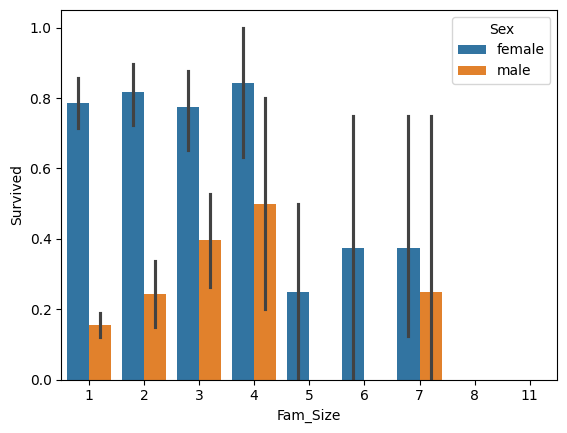

In [1091]:
sns.barplot(data=df, x='Fam_Size', y='Survived',hue='Sex')


This code uses seaborn to create a bar plot illustrating the relationship between the 'Title' variable and the 'Survived' variable, with further stratification by the 'Pclass' (Passenger Class) variable. The plot visualizes the survival rate for different titles within each passenger class in the DataFrame 'df'.

<Axes: xlabel='Title', ylabel='Survived'>

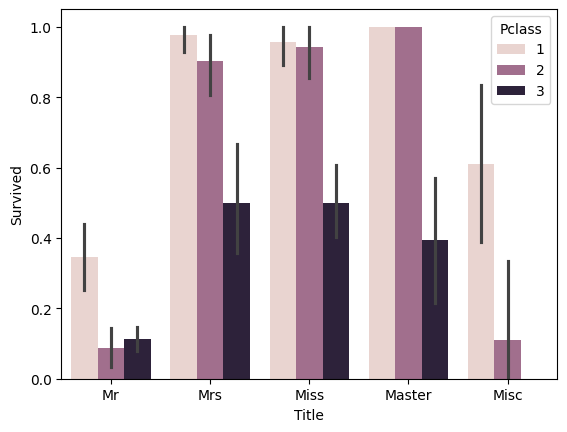

In [1092]:
sns.barplot(data=df, x='Title', y='Survived', hue='Pclass')


This code uses seaborn to create a bar plot depicting the relationship between the 'Age_Bin' variable (binned age groups), the 'Survived' variable, and stratified by the 'Sex' variable. The plot visualizes the survival rate for different age groups within each gender in the DataFrame 'df'.

<Axes: xlabel='Age_Bin', ylabel='Survived'>

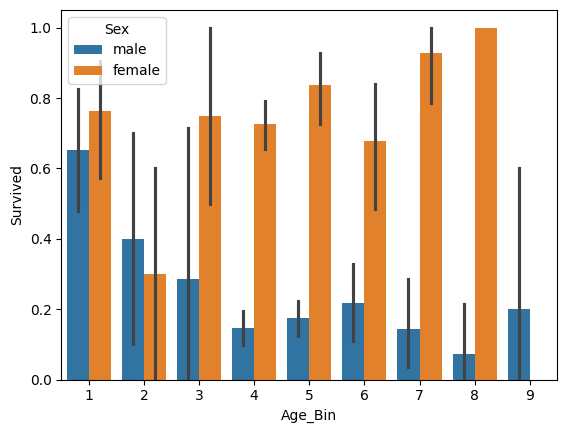

In [1093]:
sns.barplot(data=df, x='Age_Bin', y='Survived',hue='Sex')

________________________________________________________________________________________________________________________________________________________________________________

### Feature Engineering and Data Preprocessing


This code prints the column names of the DataFrame 'df'.

In [1094]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked', 'Title', 'Embarked_Code', 'Sex_Code', 'Title_Code',
       'Age_Bin', 'Fare_Bin', 'Child', 'Elder', 'Fam_Size'],
      dtype='object')


This code calculates the average survival rates for different features in the DataFrame 'df', such as 'Pclass', 'Sex', 'Title', 'Age_Bin', 'Fare_Bin', and 'Embarked'. The results are stored in variables like 'average_survival_rate_per_pclass', 'average_survival_rate_per_sex', etc.

In [1095]:
average_survival_rate_per_pclass = df.groupby('Pclass')['Survived'].mean()
average_survival_rate_per_sex = df.groupby('Sex')['Survived'].mean()
average_survival_rate_per_title = df.groupby('Title')['Survived'].mean()
average_survival_rate_per_age_bin = df.groupby('Age_Bin')['Survived'].mean()
average_survival_rate_per_fare_bin = df.groupby('Fare_Bin')['Survived'].mean()
average_survival_rate_per_embarked = df.groupby('Embarked')['Survived'].mean()


This code creates a copy of the DataFrame 'df' named 'df_survival_rate'.

In [1096]:
df_survival_rate = df.copy()


This code adds new columns to the DataFrame 'df_survival_rate' to represent survival rates and survival levels for different features such as 'Pclass', 'Sex', 'Title', 'Age_Bin', 'Fare_Bin', and 'Embarked'. The survival rates are computed based on the average survival rates per group, and then these rates are binned into four levels. Finally, a new column 'Survival_Level_Sum' is created by summing up the survival levels across all features.

In [1097]:
df_survival_rate['Survival_Rate_Pclass'] = df_survival_rate['Pclass'].map(average_survival_rate_per_pclass)
df_survival_rate['Survival_Rate_Sex'] = df_survival_rate['Sex'].map(average_survival_rate_per_sex)
df_survival_rate['Survival_Rate_Title'] = df_survival_rate['Title'].map(average_survival_rate_per_title)
df_survival_rate['Survival_Rate_Age_Bin'] = df_survival_rate['Age_Bin'].map(average_survival_rate_per_age_bin)
df_survival_rate['Survival_Rate_Fare_Bin'] = df_survival_rate['Fare_Bin'].map(average_survival_rate_per_fare_bin)
df_survival_rate['Survival_Rate_Embarked'] = df_survival_rate['Embarked'].map(average_survival_rate_per_embarked)

df_survival_rate['Survival_Level_Pclass'] = pd.cut(df_survival_rate['Survival_Rate_Pclass'], bins=4, labels=[1, 2, 3, 4]).astype(int)
df_survival_rate['Survival_Level_Sex'] = pd.cut(df_survival_rate['Survival_Rate_Sex'], bins=4, labels=[1, 2, 3, 4]).astype(int)
df_survival_rate['Survival_Level_Title'] = pd.cut(df_survival_rate['Survival_Rate_Title'], bins=4, labels=[1, 2, 3, 4]).astype(int)
df_survival_rate['Survival_Level_Age_Bin'] = pd.cut(df_survival_rate['Survival_Rate_Age_Bin'], bins=4, labels=[1, 2, 3, 4]).astype(int)
df_survival_rate['Survival_Level_Fare_Bin'] = pd.cut(df_survival_rate['Survival_Rate_Fare_Bin'], bins=4, labels=[1, 2, 3, 4]).astype(int)
df_survival_rate['Survival_Level_Embarked'] = pd.cut(df_survival_rate['Survival_Rate_Embarked'], bins=4, labels=[1, 2, 3, 4]).astype(int)

df_survival_rate['Survival_Level_Sum'] = df_survival_rate[['Survival_Level_Pclass', 'Survival_Level_Sex', 'Survival_Level_Title', 'Survival_Level_Age_Bin', 'Survival_Level_Fare_Bin', 'Survival_Level_Embarked']].sum(axis=1)


The code will print the first few rows of the adjusted dataframe.

In [1098]:
df_survival_rate.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,...,Survival_Rate_Age_Bin,Survival_Rate_Fare_Bin,Survival_Rate_Embarked,Survival_Level_Pclass,Survival_Level_Sex,Survival_Level_Title,Survival_Level_Age_Bin,Survival_Level_Fare_Bin,Survival_Level_Embarked,Survival_Level_Sum
0,1,0,3,male,22.0,1,0,7.2500,S,Mr,...,0.403694,0.198052,0.339009,1,1,1,2,1,1,7
1,2,1,1,female,38.0,1,0,71.2833,C,Mrs,...,0.304659,0.559322,0.553571,4,4,4,1,4,4,21
2,3,1,3,female,26.0,0,0,7.9250,S,Miss,...,0.403694,0.198052,0.339009,1,4,4,2,1,1,13
3,4,1,1,female,35.0,1,0,53.1000,S,Mrs,...,0.304659,0.559322,0.339009,4,4,4,1,4,1,18
4,5,0,3,male,35.0,0,0,8.0500,S,Mr,...,0.304659,0.198052,0.339009,1,1,1,1,1,1,6


This code snippet calculates and displays descriptive statistics (mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum) for each numerical column in the df_survival_rate DataFrame. It provides a summary of the central tendency, dispersion, and shape of the distribution of each numerical feature in the dataset.

In [1099]:
df_survival_rate.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title_Code,...,Survival_Rate_Age_Bin,Survival_Rate_Fare_Bin,Survival_Rate_Embarked,Survival_Level_Pclass,Survival_Level_Sex,Survival_Level_Title,Survival_Level_Age_Bin,Survival_Level_Fare_Bin,Survival_Level_Embarked,Survival_Level_Sum
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,...,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208,1.536476,0.647587,2.740741,...,0.383838,0.383838,0.383838,2.140292,2.057239,2.153760,1.803591,2.639731,1.565657,12.360269
std,257.353842,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429,0.791503,0.477990,0.896379,...,0.093212,0.149226,0.083065,1.307482,1.433970,1.407817,0.763367,1.259282,1.174116,4.624234
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.200000,0.198052,0.339009,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,2.000000,...,0.304659,0.198052,0.339009,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,8.000000
50%,446.000000,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,2.000000,1.000000,3.000000,...,0.403694,0.402778,0.339009,1.000000,1.000000,1.000000,2.000000,3.000000,1.000000,12.000000
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,3.000000,...,0.403694,0.559322,0.389610,3.000000,4.000000,4.000000,2.000000,4.000000,1.000000,16.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,4.000000,...,0.704545,0.559322,0.553571,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,23.000000



This code merges the df DataFrame with the df_survival_rate DataFrame using the common column 'PassengerId'. It includes the 'Survival_Level_Sum' column from the df_survival_rate DataFrame into the df DataFrame. The merge is performed in a left-join fashion, meaning that all rows from the df DataFrame are retained, and matching rows from the df_survival_rate DataFrame are added based on the 'PassengerId' column. If there is no match for a specific 'PassengerId', the corresponding 'Survival_Level_Sum' value will be NaN in the merged DataFrame (df).

In [1100]:
df = df.merge(df_survival_rate[['PassengerId', 'Survival_Level_Sum']], on='PassengerId', how='left')


This code removes the 'PassengerId' column from the DataFrame df in place, meaning that the change is applied directly to the DataFrame without the need for reassignment. After executing this code, the 'PassengerId' column will no longer be present in the DataFrame df.

In [1101]:
df.drop(columns = 'PassengerId', inplace=True)


This code provides descriptive statistics of the numerical columns in the DataFrame df, including measures such as mean, standard deviation, minimum, 25th percentile (Q1), median (50th percentile), 75th percentile (Q3), and maximum. These statistics offer a summary of the central tendency and spread of the numerical data in the DataFrame.






In [1102]:
df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare,Embarked_Code,Sex_Code,Title_Code,Age_Bin,Fare_Bin,Child,Elder,Fam_Size,Survival_Level_Sum
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.736034,0.523008,0.381594,32.204208,1.536476,0.647587,2.740741,4.537598,1.985410,0.093154,0.024691,1.904602,12.360269
std,0.486592,0.836071,13.014897,1.102743,0.806057,49.693429,0.791503,0.477990,0.896379,1.355592,0.822991,0.290811,0.155270,1.613459,4.624234
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,6.000000
25%,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400,1.000000,0.000000,2.000000,4.000000,1.000000,0.000000,0.000000,1.000000,8.000000
50%,0.000000,3.000000,30.000000,0.000000,0.000000,14.454200,2.000000,1.000000,3.000000,4.000000,2.000000,0.000000,0.000000,1.000000,12.000000
75%,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000,2.000000,1.000000,3.000000,5.000000,3.000000,0.000000,0.000000,2.000000,16.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200,2.000000,1.000000,4.000000,9.000000,3.000000,1.000000,1.000000,11.000000,23.000000



This code creates a new categorical feature called 'Survival_Level_Rank' in the DataFrame df. It bins the values of the 'Survival_Level_Sum' column into four intervals using quantiles (q=4) and assigns labels 1, 2, 3, and 4 to each interval. The resulting feature represents the rank of the cumulative survival level for each passenger.

In [1103]:
df['Survival_Level_Rank'] = pd.qcut(df['Survival_Level_Sum'], q=4, labels=[1, 2, 3, 4]).astype(int)



This code creates a bar plot to visualize the relationship between the 'Age_Bin' feature and the 'Survived' target variable, while differentiating by the 'Pclass' feature. The x-axis represents the age bins, the y-axis represents the survival rate, and different colors are used to distinguish between different passenger classes ('Pclass').

<Axes: xlabel='Age_Bin', ylabel='Survived'>

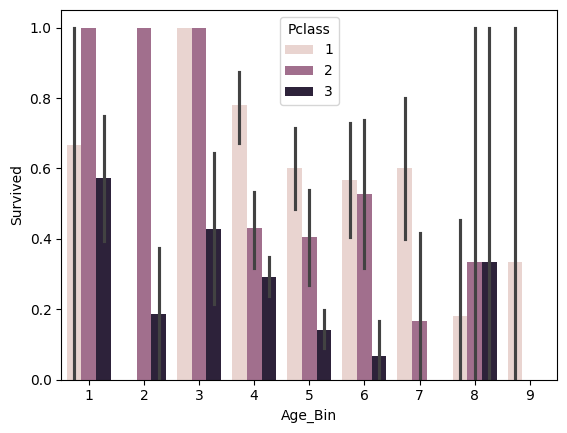

In [1104]:
sns.barplot(data=df, x='Age_Bin', y='Survived',hue='Pclass')

This code generates a bar plot to illustrate the relationship between the 'Survival_Level_Sum' feature and the 'Survived' target variable, with differentiation by the 'Sex' feature. The x-axis represents the survival level sum, the y-axis represents the survival rate, and different colors are used to distinguish between different genders ('Sex').

<Axes: xlabel='Survival_Level_Sum', ylabel='Survived'>

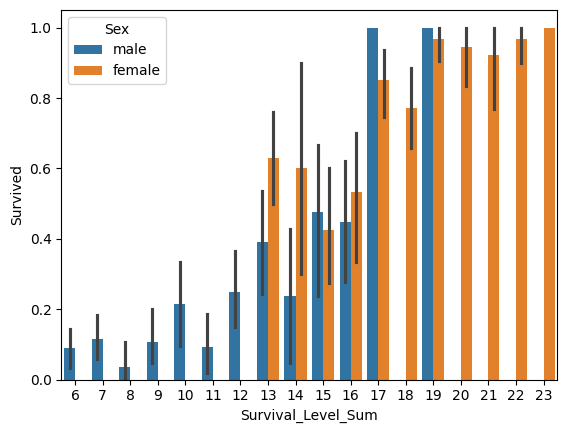

In [1105]:
sns.barplot(data=df, x='Survival_Level_Sum', y='Survived',hue='Sex')


This code creates a bar plot to depict the relationship between the 'Survival_Level_Rank' feature and the 'Survived' target variable, with differentiation by the 'Sex' feature. The x-axis represents the survival level rank, the y-axis represents the survival rate, and different colors are used to distinguish between different genders ('Sex').

<Axes: xlabel='Survival_Level_Rank', ylabel='Survived'>

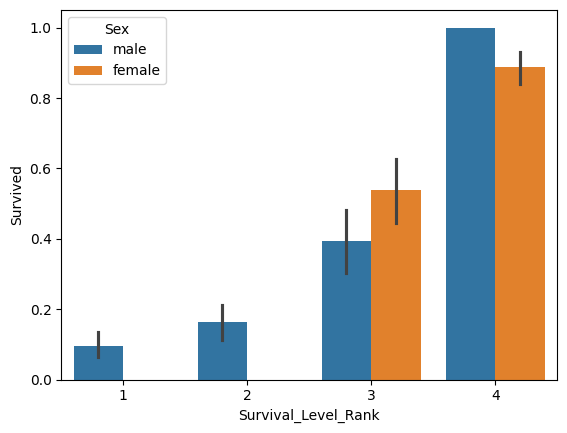

In [1106]:
sns.barplot(data=df, x='Survival_Level_Rank', y='Survived',hue='Sex')


This code generates a bar plot to illustrate the survival rate per age bin, categorized by gender ('Sex'). The x-axis represents the age bin, the y-axis represents the survival rate, and different colors are used to distinguish between different genders.

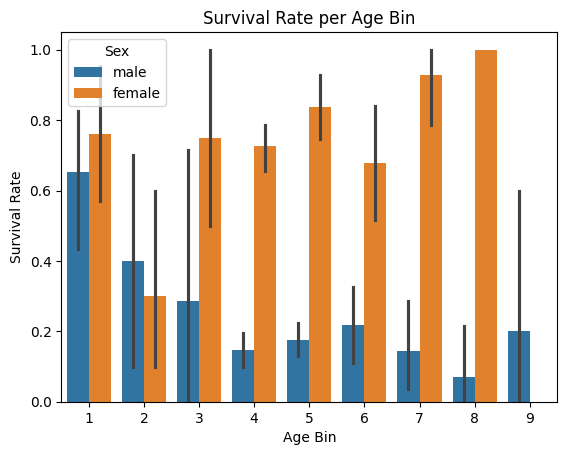

In [1107]:
survival_rate_per_age_bin = df.groupby(['Sex', 'Age_Bin'])['Survived'].mean()

sns.barplot(data=df, x='Age_Bin', y='Survived', hue='Sex')
plt.xlabel('Age Bin')
plt.ylabel('Survival Rate')
plt.title('Survival Rate per Age Bin')
plt.show()



This code creates a violin plot to visualize the distribution of ages categorized by gender ('Sex') and survival status ('Survived'). The plot is split to show the distribution for each category separately, using different colors ('red' for not survived and 'green' for survived). The x-axis represents gender, and the y-axis represents age. The title of the plot is "Age Distribution by Pclass and Sex."

Text(0.5, 1.0, 'Age Distribution by Pclass and Sex')

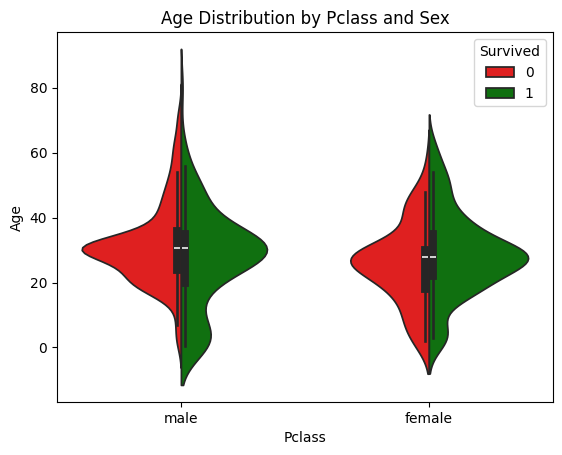

In [1108]:
sns.violinplot(data=df, x='Sex', y='Age', hue='Survived', split=True, palette=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Pclass and Sex')



This code creates a violin plot to visualize the distribution of ages categorized by passenger class ('Pclass') and survival status ('Survived'). The plot is split to show the distribution for each category separately, using different colors ('red' for not survived and 'green' for survived). The x-axis represents passenger class, and the y-axis represents age. The title of the plot is "Age Distribution by Pclass and Survival Status."

Text(0.5, 1.0, 'Age Distribution by Pclass and Sex')

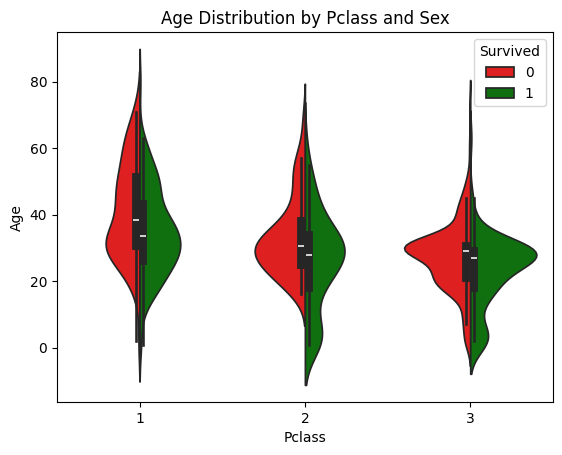

In [1109]:
sns.violinplot(data=df, x='Pclass', y='Age', hue='Survived', split=True, palette=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Pclass and Sex')



This code creates a violin plot to visually represent the distribution of ages based on the embarkation point ('Embarked') while distinguishing between survival ('Survived') and non-survival. The plot uses different colors ('red' and 'green') to indicate the survival status, providing insights into the age patterns among passengers from different embarkation points.

Text(0.5, 1.0, 'Age Distribution by Pclass and Sex')

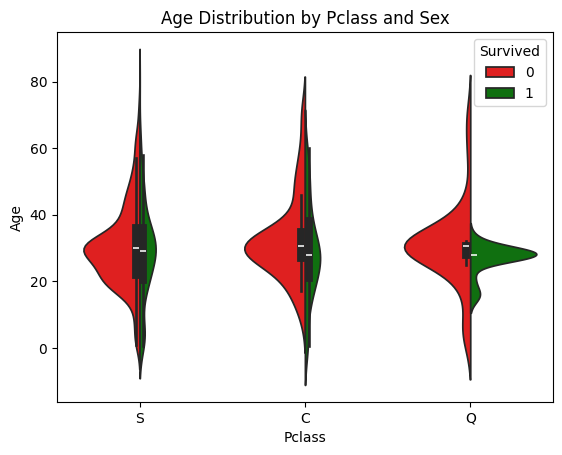

In [1110]:
sns.violinplot(data=df, x='Embarked', y='Age', hue='Survived', split=True, palette=['red', 'green'])
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.title('Age Distribution by Pclass and Sex')

This code calculates the death rate for each unique value in the 'SibSp' column (number of siblings/spouses aboard) by grouping the data based on 'SibSp' and computing the percentage of passengers who did not survive (Survived == 0) within each group. The results are printed to show the death rate for each 'SibSp' value.

In [1111]:
death_rate_per_SibSp = df.groupby('SibSp')['Survived'].apply(lambda x: (x == 0).sum() / len(x)*100)
print(death_rate_per_SibSp)

SibSp
0     65.460526
1     46.411483
2     53.571429
3     75.000000
4     83.333333
5    100.000000
8    100.000000
Name: Survived, dtype: float64



This code creates binary columns 'Alone' and 'Big_Fam' indicating whether a passenger is alone (without family members) or part of a large family (more than four family members), respectively.

In [1112]:
df['Alone'] = ((df['Fam_Size'] == 1)).astype(int)
df['Big_Fam'] = ((df['Fam_Size'] > 4)).astype(int)

We then take a look at the dataset by seeing the first few rows.

In [1113]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,Embarked_Code,...,Title_Code,Age_Bin,Fare_Bin,Child,Elder,Fam_Size,Survival_Level_Sum,Survival_Level_Rank,Alone,Big_Fam
0,0,3,male,22.0,1,0,7.2500,S,Mr,2,...,3,4,1,0,0,2,7,1,0,0
1,1,1,female,38.0,1,0,71.2833,C,Mrs,0,...,4,5,3,0,0,2,21,4,0,0
2,1,3,female,26.0,0,0,7.9250,S,Miss,2,...,2,4,1,0,0,1,13,3,1,0
3,1,1,female,35.0,1,0,53.1000,S,Mrs,2,...,4,5,3,0,0,2,18,4,0,0
4,0,3,male,35.0,0,0,8.0500,S,Mr,2,...,3,5,1,0,0,1,6,1,1,0


Individuals identified as adult males in the 3rd class, particularly those with large family sizes or traveling alone, exhibit significantly higher likelihoods of not surviving.


The code selects numeric columns from the DataFrame, computes the correlation matrix, and visualizes it using a heatmap, where each cell represents the correlation coefficient between two numeric features.

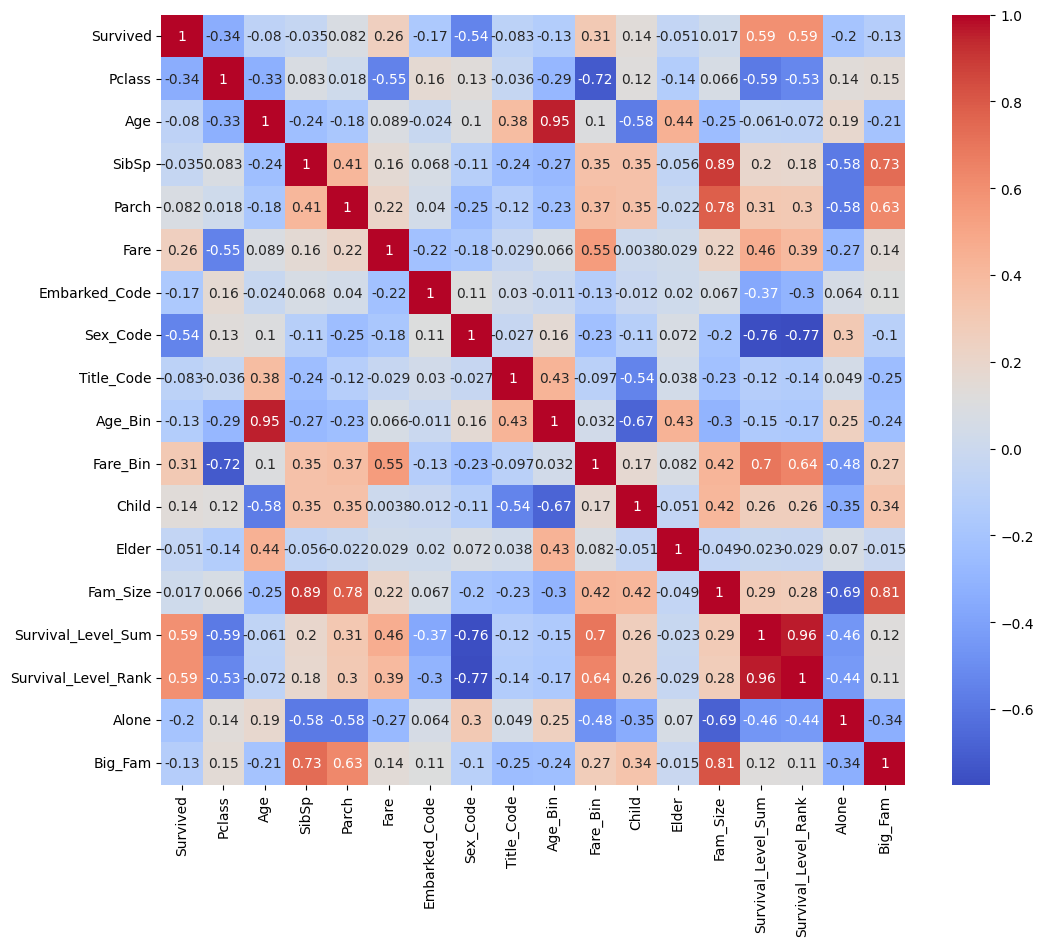

In [1114]:
# Select only numeric columns
numeric_columns = df.select_dtypes(include=['number'])

# Compute correlation matrix
correlation_matrix = numeric_columns.corr()

# Plot heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()



This code calculates the correlation coefficients between the 'Survived' column and other numeric features, sorting them in descending order. It helps identify which numeric features are most positively or negatively correlated with the 'Survived' column.

In [1115]:
survived_correlation = correlation_matrix['Survived'].sort_values(ascending=False)
print(survived_correlation)


Survived               1.000000
Survival_Level_Rank    0.594900
Survival_Level_Sum     0.591124
Fare_Bin               0.305799
Fare                   0.257307
Child                  0.136107
Parch                  0.081629
Fam_Size               0.016639
SibSp                 -0.035322
Elder                 -0.051224
Age                   -0.080453
Title_Code            -0.083292
Big_Fam               -0.125147
Age_Bin               -0.134327
Embarked_Code         -0.167675
Alone                 -0.203367
Pclass                -0.338481
Sex_Code              -0.543351
Name: Survived, dtype: float64


I print out the columns in the dataset.

In [1116]:
df.columns

Index(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked', 'Title', 'Embarked_Code', 'Sex_Code', 'Title_Code',
       'Age_Bin', 'Fare_Bin', 'Child', 'Elder', 'Fam_Size',
       'Survival_Level_Sum', 'Survival_Level_Rank', 'Alone', 'Big_Fam'],
      dtype='object')


This code defines lists of categorical and numerical columns, along with the target column for a dataset. It suggests that the dataset may involve categorical features like passenger class, sex, and embarked code, numerical features like the number of parents/children aboard, and a target variable 'Survived'.







In [1117]:
cat_columns = ['Pclass', 'Sex_Code', 'Embarked_Code', 'Child', 'Elder', 'Age_Bin', 'Alone', 'Big_Fam', 'Title_Code', 'Fare_Bin', 'Survival_Level_Rank']
num_columns = ['Parch']
target = 'Survived'


This code performs a two-step split on the dataset, first dividing it into training (70%) and testing/validation (30%) sets. Then, the testing/validation set is further split into testing (50% of 30%) and validation (50% of 30%) subsets, resulting in three distinct subsets for training, testing, and validation.

In [1118]:
X_train_temp, X_test_valid, y_train_temp, y_test_valid = train_test_split(df[cat_columns + num_columns], df[target], test_size=0.3, random_state=42)

# Second split: Split the 20% into testing and validation (50% each of 20% -> 10% each of total data)
X_test, X_valid, y_test, y_valid = train_test_split(X_test_valid, y_test_valid, test_size=0.5, random_state=42)


This code defines a preprocessing pipeline using scikit-learn's ColumnTransformer. It applies one-hot encoding to categorical columns (cat_columns) and standard scaling to numeric columns (num_columns). The resulting preprocessor can be used in a machine learning model pipeline to transform the input data accordingly.

In [1119]:
cat_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])
num_transformer = Pipeline(steps=[('scaler', StandardScaler())])
preprocessor = ColumnTransformer(transformers=[('cat', cat_transformer, cat_columns), ('num', num_transformer, num_columns)])


The code applies the previously defined preprocessor to transform the training (X_train_temp), testing (X_test), and validation (X_valid) datasets, resulting in transformed versions of these datasets suitable for machine learning model training and evaluation.

In [1120]:
X_train_transformed = preprocessor.fit_transform(X_train_temp)
X_test_transformed = preprocessor.transform(X_test)
X_valid_transformed = preprocessor.transform(X_valid)

________________________________________________________________________________________________________________________________________________________________________________

### Linear Support Vector Machine


This code performs a grid search using cross-validation to find the best hyperparameters for a Linear Support Vector Classification (LinearSVC) model. It then fits the model with the best parameters on the training data (X_train_transformed, y_train_temp) and evaluates its performance on the test set (X_test_transformed, y_test) and the validation set (X_valid_transformed, y_valid). The accuracy, F1 score, and AUC score for both the test and validation sets are printed.

In [1121]:
param_grid = {'C': [0.1, 1, 10, 100], 'max_iter': [5000, 10000], 'dual': [False, True]}

grid_search = GridSearchCV(LinearSVC(), param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train_temp)
best_params = grid_search.best_params_
print("Best parameters found:", best_params)

best_linear_model = grid_search.best_estimator_


linear_predict_test = best_linear_model.predict(X_test_transformed)
print("Test set accuracy:",metrics.accuracy_score(y_test, linear_predict_test))
print("Test set F1 score:",f1_score(y_test, linear_predict_test))
print("Test set AUC score:",roc_auc_score(y_test, linear_predict_test))


linear_predict_valid = best_linear_model.predict(X_valid_transformed)
linear_accuracy_score_valid =  metrics.accuracy_score(y_valid, linear_predict_valid)
linear_f1_score_valid = f1_score(y_valid, linear_predict_valid)
linear_auc_score_valid = roc_auc_score(y_valid, linear_predict_valid)

/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increas

Best parameters found: {'C': 1, 'dual': False, 'max_iter': 5000}
Test set accuracy: 0.8507462686567164
Test set F1 score: 0.8305084745762712
Test set AUC score: 0.8470982142857143


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(



The code generates a ROC Curve and calculates the Area Under the Curve (AUC) for evaluating the performance of a Linear Support Vector Classifier (LinearSVC) model on the test set. The ROC Curve illustrates the trade-off between true positive and false positive rates, with a higher AUC indicating better model performance.

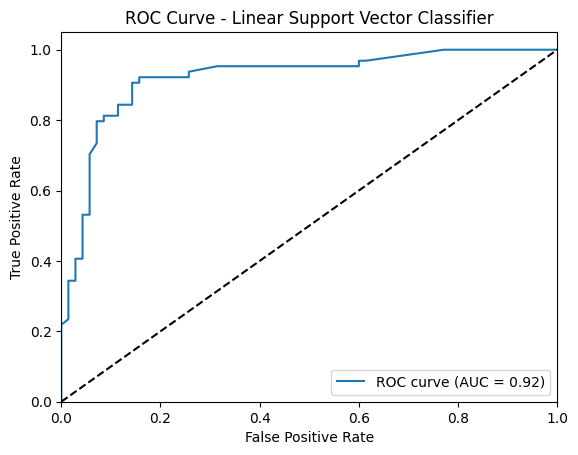

In [1122]:
# ROC Curve and AUC for test set - LinearSVC
linear_predict_proba_test = best_linear_model.decision_function(X_test_transformed)
fpr, tpr, thresholds = metrics.roc_curve(y_test, linear_predict_proba_test)
linear_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % linear_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Linear Support Vector Classifier')
plt.legend(loc="lower right")
plt.show()


________________________________________________________________________________________________________________________________________________________________________________

### Random Forest Classifier


This code performs a grid search using cross-validation to find the best hyperparameters for a Random Forest Classifier. It then fits the model with the best parameters on the training data (X_train_transformed, y_train_temp) and evaluates its performance on the test set (X_test_transformed, y_test) and the validation set (X_valid_transformed, y_valid). The accuracy, F1 score, and AUC score for both the test and validation sets are printed.

In [1123]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

grid_search = GridSearchCV(RandomForestClassifier(), param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_transformed, y_train_temp)

best_params = grid_search.best_params_
print("Best parameters found:", best_params)

best_rf_model = grid_search.best_estimator_
rf_predict_test = best_rf_model.predict(X_test_transformed)
print("Test set accuracy:",metrics.accuracy_score(y_test, rf_predict_test))
print("Test set F1 score:", f1_score(y_test, rf_predict_test))
print("Test set AUC score:",roc_auc_score(y_test, rf_predict_test))


rf_predict_valid = best_rf_model.predict(X_valid_transformed)
rf_accuracy_score_valid =  metrics.accuracy_score(y_valid, rf_predict_valid)
rf_f1_score_valid = f1_score(y_valid, rf_predict_valid)
rf_auc_score_valid = roc_auc_score(y_valid, rf_predict_valid)


Best parameters found: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 50}
Test set accuracy: 0.8656716417910447
Test set F1 score: 0.85
Test set AUC score: 0.8627232142857143



This code generates a Receiver Operating Characteristic (ROC) curve for the Random Forest Classifier on the test set (X_test_transformed, y_test). It calculates the True Positive Rate (Sensitivity) against the False Positive Rate across different probability thresholds. The Area Under the Curve (AUC) is also calculated and displayed in the plot. The diagonal line represents a random classifier.

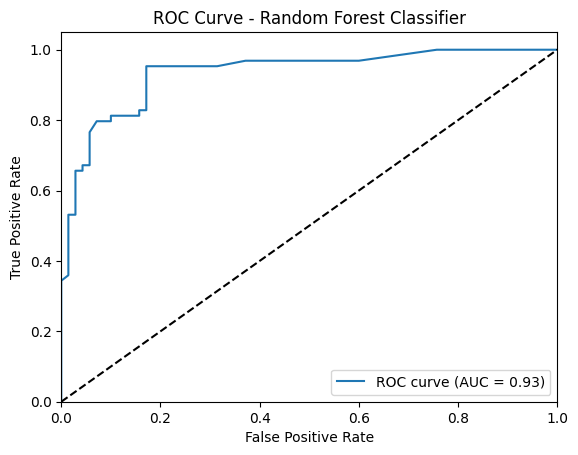

In [1124]:
rf_predict_proba_test = best_rf_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, rf_predict_proba_test)
rf_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % rf_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Random Forest Classifier')
plt.legend(loc="lower right")
plt.show()

________________________________________________________________________________________________________________________________________________________________________________

### XG Boost Classifier


The code performs a grid search to find the best hyperparameters for an XGBoost classifier using cross-validation on the training data. It then evaluates the model's performance on the test set and computes accuracy, F1 score, and ROC AUC score.

In [1125]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.01, 0.001]
}

xgb_model = xgb.XGBClassifier()

grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=3, scoring='accuracy')
grid_search.fit(X_train_transformed, y_train_temp)


best_params = grid_search.best_params_
print("Best Parameters:", best_params)

best_xgb_model = grid_search.best_estimator_

xgb_predict_test = best_xgb_model.predict(X_test_transformed)


print(metrics.accuracy_score(y_test, xgb_predict_test))
print(f1_score(y_test, xgb_predict_test))
print(roc_auc_score(y_test, xgb_predict_test))


xgb_predict_valid = best_xgb_model.predict(X_valid_transformed)
xgb_accuracy_score_valid =  metrics.accuracy_score(y_valid, xgb_predict_valid)
xgb_f1_score_valid = f1_score(y_valid, xgb_predict_valid)
xgb_auc_score_valid = roc_auc_score(y_valid, xgb_predict_valid)

Best Parameters: {'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 200}
0.8656716417910447
0.8448275862068966
0.8613839285714285



The code generates an ROC curve and computes the AUC score for the XGBoost model on the test set. The plot visualizes the trade-off between true positive rate and false positive rate, indicating the model's discriminatory power.

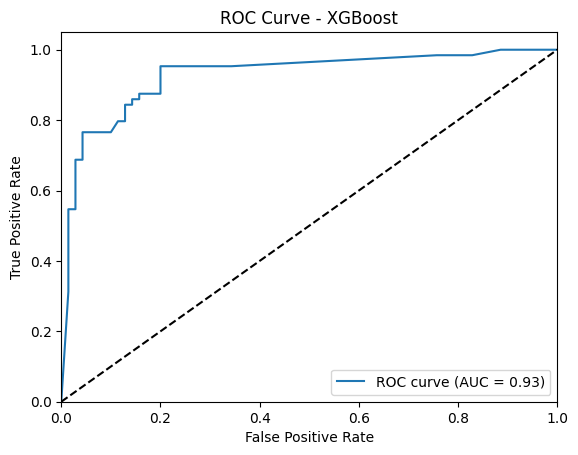

In [1126]:
# ROC Curve and AUC for test set
xgb_predict_proba_test = best_xgb_model.predict_proba(X_test_transformed)[:, 1]
fpr, tpr, thresholds = metrics.roc_curve(y_test, xgb_predict_proba_test)
xgb_auc_score = auc(fpr, tpr)

plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % xgb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - XGBoost')
plt.legend(loc="lower right")
plt.show()

________________________________________________________________________________________________________________________________________________________________________________

### Decision Tree


The code performs a grid search to find the best hyperparameters for a Decision Tree model, then evaluates the model's performance on both the test set and the validation set. The evaluation includes accuracy, F1 score, and AUC score metrics.

In [1127]:
# Define the parameter grid for Decision Tree
param_grid_dt = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 4, 6],
    'min_samples_leaf': [1, 2, 4]
}

# Create a Decision Tree model
dt_model = DecisionTreeClassifier()

# Perform grid search using cross-validation
grid_search_dt = GridSearchCV(dt_model, param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_dt.fit(X_train_transformed, y_train_temp)

# Get the best parameters
best_params_dt = grid_search_dt.best_params_
print("Best parameters found:", best_params_dt)

# Get the best Decision Tree model
best_dt_model = grid_search_dt.best_estimator_

# Make predictions on the test set
dt_predict_test = best_dt_model.predict(X_test_transformed)

# Evaluate the model on the test set
dt_accuracy_test = metrics.accuracy_score(y_test, dt_predict_test)
dt_f1_test = f1_score(y_test, dt_predict_test)
dt_auc_test = roc_auc_score(y_test, dt_predict_test)

print("Test set accuracy:", dt_accuracy_test)
print("Test set F1 score:", dt_f1_test)
print("Test set AUC score:", dt_auc_test)

# Make predictions on the validation set
dt_predict_valid = best_dt_model.predict(X_valid_transformed)

# Evaluate the model on the validation set
dt_accuracy_valid = metrics.accuracy_score(y_valid, dt_predict_valid)
dt_f1_valid = f1_score(y_valid, dt_predict_valid)
dt_auc_valid = roc_auc_score(y_valid, dt_predict_valid)

print("Validation set accuracy:", dt_accuracy_valid)
print("Validation set F1 score:", dt_f1_valid)
print("Validation set AUC score:", dt_auc_valid)


Best parameters found: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2}
Test set accuracy: 0.8507462686567164
Test set F1 score: 0.8305084745762712
Test set AUC score: 0.8470982142857143
Validation set accuracy: 0.7761194029850746
Validation set F1 score: 0.6666666666666666
Validation set AUC score: 0.7444362924920518



The code calculates and plots the ROC curve for the Decision Tree model, showing the trade-off between false positive rate (FPR) and true positive rate (TPR) at different probability thresholds. The area under the ROC curve (AUC) is also calculated and displayed in the plot.

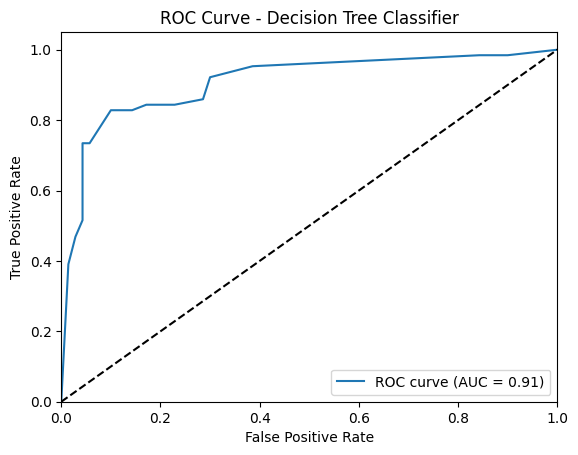

In [1128]:
# Predict probabilities for the positive class (class 1)
dt_predict_proba_test = best_dt_model.predict_proba(X_test_transformed)[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, dt_predict_proba_test)
dt_auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % dt_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Decision Tree Classifier')
plt.legend(loc="lower right")
plt.show()


________________________________________________________________________________________________________________________________________________________________________________

### K-Nearest Neighbors 


The code performs a grid search to find the best hyperparameters for the K-Nearest Neighbors (KNN) model using cross-validation. It then evaluates the performance of the KNN model on both the test and validation sets, reporting accuracy, F1 score, and AUC score for each.

In [1129]:
# Define the parameter grid for KNN
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']
}

# Create a KNN model
knn_model = KNeighborsClassifier()

# Perform grid search using cross-validation
grid_search_knn = GridSearchCV(knn_model, param_grid_knn, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_knn.fit(X_train_transformed, y_train_temp)

# Get the best parameters
best_params_knn = grid_search_knn.best_params_
print("Best parameters found:", best_params_knn)

# Get the best KNN model
best_knn_model = grid_search_knn.best_estimator_

# Make predictions on the test set
knn_predict_test = best_knn_model.predict(X_test_transformed)

# Evaluate the model on the test set
knn_accuracy_test = metrics.accuracy_score(y_test, knn_predict_test)
knn_f1_test = f1_score(y_test, knn_predict_test)
knn_auc_test = roc_auc_score(y_test, knn_predict_test)

print("Test set accuracy:", knn_accuracy_test)
print("Test set F1 score:", knn_f1_test)
print("Test set AUC score:", knn_auc_test)

# Make predictions on the validation set
knn_predict_valid = best_knn_model.predict(X_valid_transformed)

# Evaluate the model on the validation set
knn_accuracy_valid = metrics.accuracy_score(y_valid, knn_predict_valid)
knn_f1_valid = f1_score(y_valid, knn_predict_valid)
knn_auc_valid = roc_auc_score(y_valid, knn_predict_valid)

print("Validation set accuracy:", knn_accuracy_valid)
print("Validation set F1 score:", knn_f1_valid)
print("Validation set AUC score:", knn_auc_valid)


Best parameters found: {'algorithm': 'ball_tree', 'n_neighbors': 9, 'weights': 'uniform'}
Test set accuracy: 0.835820895522388
Test set F1 score: 0.8103448275862069
Test set AUC score: 0.8314732142857143
Validation set accuracy: 0.7985074626865671
Validation set F1 score: 0.6896551724137931
Validation set AUC score: 0.7616776718023968



The code generates the Receiver Operating Characteristic (ROC) curve and the Area Under the Curve (AUC) score for the K-Nearest Neighbors (KNN) model on the test set. The ROC curve visually represents the trade-off between true positive rate and false positive rate at various thresholds, while the AUC score quantifies the model's ability to distinguish between positive and negative instances.

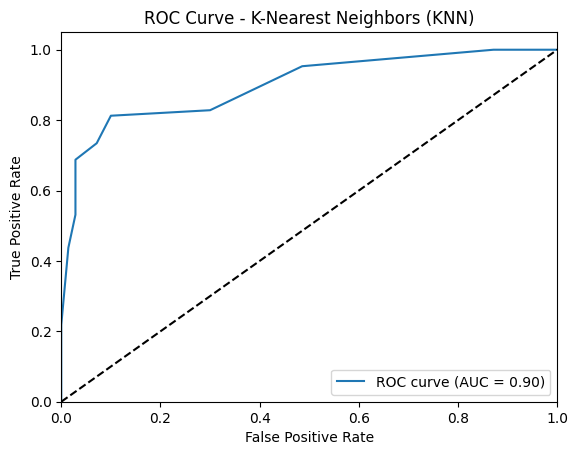

In [1130]:
# Predict probabilities for the positive class (class 1)
knn_predict_proba_test = best_knn_model.predict_proba(X_test_transformed)[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, knn_predict_proba_test)
knn_auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % knn_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - K-Nearest Neighbors (KNN)')
plt.legend(loc="lower right")
plt.show()


________________________________________________________________________________________________________________________________________________________________________________

### Naive Bayes


The code performs model training and evaluation for the Gaussian Naive Bayes classifier. It uses cross-validation and grid search to find the best hyperparameters (though there are none for Gaussian Naive Bayes) and then evaluates the model's performance on the test and validation sets, reporting accuracy, F1 score, and AUC score.

In [1131]:
# Define the parameter grid for Naive Bayes
param_grid_nb = {
    # No hyperparameters to tune for Gaussian Naive Bayes
}

# Create a Gaussian Naive Bayes model
nb_model = GaussianNB()

# Perform grid search using cross-validation
grid_search_nb = GridSearchCV(nb_model, param_grid_nb, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_nb.fit(X_train_transformed, y_train_temp)

# Get the best parameters (Note: Since Gaussian Naive Bayes has no hyperparameters to tune, this step is optional)
best_params_nb = grid_search_nb.best_params_
print("Best parameters found:", best_params_nb)

# Get the best Naive Bayes model
best_nb_model = grid_search_nb.best_estimator_

# Make predictions on the test set
nb_predict_test = best_nb_model.predict(X_test_transformed)

# Evaluate the model on the test set
nb_accuracy_test = metrics.accuracy_score(y_test, nb_predict_test)
nb_f1_test = f1_score(y_test, nb_predict_test)
nb_auc_test = roc_auc_score(y_test, nb_predict_test)

print("Test set accuracy:", nb_accuracy_test)
print("Test set F1 score:", nb_f1_test)
print("Test set AUC score:", nb_auc_test)

# Make predictions on the validation set
nb_predict_valid = best_nb_model.predict(X_valid_transformed)

# Evaluate the model on the validation set
nb_accuracy_valid = metrics.accuracy_score(y_valid, nb_predict_valid)
nb_f1_valid = f1_score(y_valid, nb_predict_valid)
nb_auc_valid = roc_auc_score(y_valid, nb_predict_valid)

print("Validation set accuracy:", nb_accuracy_valid)
print("Validation set F1 score:", nb_f1_valid)
print("Validation set AUC score:", nb_auc_valid)


Best parameters found: {}
Test set accuracy: 0.8134328358208955
Test set F1 score: 0.8031496062992126
Test set AUC score: 0.8127232142857143
Validation set accuracy: 0.7611940298507462
Validation set F1 score: 0.68
Validation set AUC score: 0.7525067253607238



The code calculates the ROC curve and AUC score for the Gaussian Naive Bayes classifier on the test set and visualizes the ROC curve. The AUC score is a measure of the model's ability to distinguish between positive and negative instances, with a higher AUC indicating better performance.

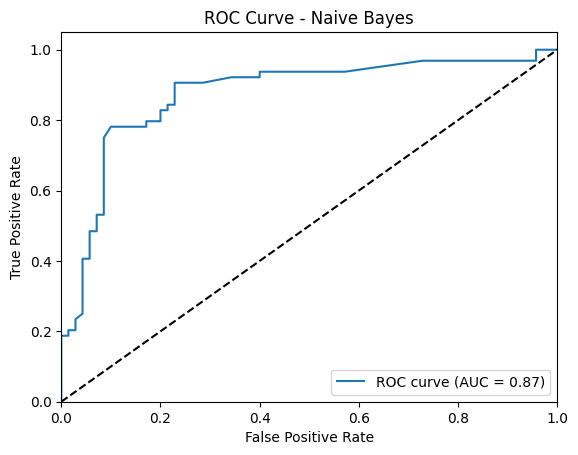

In [1132]:
# Predict probabilities for the positive class (class 1)
nb_predict_proba_test = best_nb_model.predict_proba(X_test_transformed)[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, nb_predict_proba_test)
nb_auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % nb_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Naive Bayes')
plt.legend(loc="lower right")
plt.show()


________________________________________________________________________________________________________________________________________________________________________________

### Logistic Regression

The code performs a grid search to find the best hyperparameters for a Logistic Regression model using cross-validation. It then evaluates the model's performance on the test set and the validation set, reporting accuracy, F1 score, and AUC score for each set.

In [1133]:
# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga']
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Perform grid search using cross-validation
grid_search_logreg = GridSearchCV(logreg_model, param_grid_logreg, cv=5, scoring='accuracy', n_jobs=-1)
grid_search_logreg.fit(X_train_transformed, y_train_temp)

# Get the best parameters
best_params_logreg = grid_search_logreg.best_params_
print("Best parameters found:", best_params_logreg)

# Get the best Logistic Regression model
best_logreg_model = grid_search_logreg.best_estimator_

# Make predictions on the test set
logreg_predict_test = best_logreg_model.predict(X_test_transformed)

# Evaluate the model on the test set
logreg_accuracy_test = metrics.accuracy_score(y_test, logreg_predict_test)
logreg_f1_test = f1_score(y_test, logreg_predict_test)
logreg_auc_test = roc_auc_score(y_test, logreg_predict_test)

print("Test set accuracy:", logreg_accuracy_test)
print("Test set F1 score:", logreg_f1_test)
print("Test set AUC score:", logreg_auc_test)

# Make predictions on the validation set
logreg_predict_valid = best_logreg_model.predict(X_valid_transformed)

# Evaluate the model on the validation set
logreg_accuracy_valid = metrics.accuracy_score(y_valid, logreg_predict_valid)
logreg_f1_valid = f1_score(y_valid, logreg_predict_valid)
logreg_auc_valid = roc_auc_score(y_valid, logreg_predict_valid)

print("Validation set accuracy:", logreg_accuracy_valid)
print("Validation set F1 score:", logreg_f1_valid)
print("Validation set AUC score:", logreg_auc_valid)


Best parameters found: {'C': 1, 'penalty': 'l1', 'solver': 'liblinear'}
Test set accuracy: 0.8656716417910447
Test set F1 score: 0.85
Test set AUC score: 0.8627232142857143
Validation set accuracy: 0.7985074626865671
Validation set F1 score: 0.6896551724137931
Validation set AUC score: 0.7616776718023968


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The ma


The code generates a ROC curve and calculates the Area Under the Curve (AUC) for the Logistic Regression model on the test set. The plot visualizes the trade-off between True Positive Rate and False Positive Rate, with a higher AUC indicating better model performance.

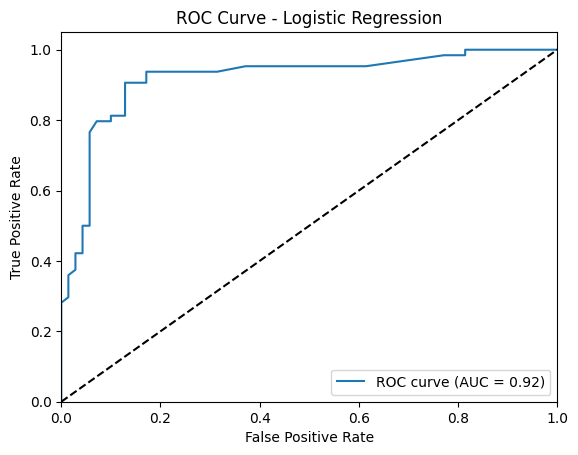

In [1134]:
# Predict probabilities for the positive class (class 1)
logreg_predict_proba_test = best_logreg_model.predict_proba(X_test_transformed)[:, 1]

# Calculate False Positive Rate (fpr), True Positive Rate (tpr), and thresholds
fpr, tpr, thresholds = metrics.roc_curve(y_test, logreg_predict_proba_test)
logreg_auc_score = auc(fpr, tpr)

# Plot ROC Curve
plt.plot(fpr, tpr, label='ROC curve (AUC = %0.2f)' % logreg_auc_score)
plt.plot([0, 1], [0, 1], 'k--')  # Plot the diagonal line
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve - Logistic Regression')
plt.legend(loc="lower right")
plt.show()

________________________________________________________________________________________________________________________________________________________________________________

### Model Evaluation


This code provides a comprehensive overview of the dataset and performance metrics for multiple machine learning models on the validation set. It includes the number of examples, number of features, examples per class, and descriptive statistics for features in the training, validation, and test datasets. Additionally, it reports the performance metrics (accuracy, F1 score, and AUC score) for seven different models: Linear SVC, Random Forest Classifier, XGB Classifier, Decision Tree, KNeighborsClassifier, Naive Bayes, and Logistic Regression, all evaluated on the validation set.

In [1135]:
# Data description
print("Data description")
print("----------------")
# Number of examples
print("Number of examples")
print(f"train: {len(X_train_temp)}")
print(f"valid: {len(X_valid)}")
print(f"test: {len(X_test)}")
# Number of features
print(f"Number of features: {X_train_temp.shape[1]}")

# Number of examples per class (assuming binary classification)
print("\nNumber of examples per class")
print(f"class 0: {sum(y_train_temp == 0)}")
print(f"class 1: {sum(y_train_temp == 1)}")

# Descriptive statistics for features
print("\nDescriptive statistics")
print("----------------------")

# Calculate statistics for training dataset features
train_stats = X_train_temp.describe().transpose()

# Calculate statistics for validation dataset features
valid_stats = X_valid.describe().transpose()

# Calculate statistics for test dataset features
test_stats = X_test.describe().transpose()

# Print statistics for each dataset
for dataset_name, dataset_stats in zip(['Training', 'Validation', 'Test'], [train_stats, valid_stats, test_stats]):
    print(f"{dataset_name} dataset:")
    print(dataset_stats[['mean', '50%', 'std']])

# Results (you can add your model information here)
print("\nModel Results")
print("\n")

print("Model 1: Linear SVC")
print("----------------------------------")
print("Accuracy - Validation:", linear_accuracy_score_valid)
print("F1 Score - Validation:", linear_f1_score_valid)
print("AUC Score - Validation:", linear_auc_score_valid)
print("\n")

print("Model 2: Random Forest Classifier")
print("----------------------------------")
print("Accuracy - Validation:", rf_accuracy_score_valid)
print("F1 Score - Validation:", rf_f1_score_valid)
print("AUC Score - Validation:", rf_auc_score_valid)
print("\n")

print("Model 3: XGB Classifier")
print("----------------------------------")
print("Accuracy - Validation:", xgb_accuracy_score_valid)
print("F1 Score - Validation:", xgb_f1_score_valid)
print("AUC Score - Validation:", xgb_auc_score_valid)
print("\n")

print("Model 4: Decision Tree")
print("----------------------------------")
print("Accuracy - Validation:", dt_accuracy_valid)
print("F1 Score - Validation:", dt_f1_valid)
print("AUC Score - Validation:", dt_auc_valid)
print("\n")

print("Model 5: KNeighborsClassifier")
print("----------------------------------")
print("Accuracy - Validation:", knn_accuracy_valid)
print("F1 Score - Validation:", knn_f1_valid)
print("AUC Score - Validation:", knn_auc_valid)
print("\n")

print("Model 6: Naive Bayes")
print("----------------------------------")
print("Accuracy - Validation:", nb_accuracy_valid)
print("F1 Score - Validation:", nb_f1_valid)
print("AUC Score - Validation:", nb_auc_valid)
print("\n")

print("Model 7: Logistic Regression")
print("----------------------------------")
print("Accuracy - Validation:", logreg_accuracy_valid)
print("F1 Score - Validation:", logreg_f1_valid)
print("AUC Score - Validation:", logreg_auc_valid)
print("\n")

Data description
----------------
Number of examples
train: 623
valid: 134
test: 134
Number of features: 12

Number of examples per class
class 0: 392
class 1: 231

Descriptive statistics
----------------------
Training dataset:
                         mean  50%       std
Pclass               2.341894  3.0  0.819945
Sex_Code             0.658106  1.0  0.474725
Embarked_Code        1.558587  2.0  0.775024
Child                0.102729  0.0  0.303848
Elder                0.016051  0.0  0.125774
Age_Bin              4.497592  4.0  1.372529
Alone                0.597111  1.0  0.490873
Big_Fam              0.073836  0.0  0.261714
Title_Code           2.727127  3.0  0.903380
Fare_Bin             1.977528  2.0  0.817499
Survival_Level_Rank  2.402889  2.0  1.089171
Parch                0.386838  0.0  0.807692
Validation dataset:
                         mean  50%       std
Pclass               2.179104  2.5  0.891486
Sex_Code             0.649254  1.0  0.478994
Embarked_Code        1.477612  


This code provides a concise summary of the dataset by displaying the number of examples in the training, validation, and test sets, the number of features, and the distribution of examples per class (class 0 and class 1) in each set.

In [1136]:
print("Data description")
print("----------------")
print("Number of examples")
print(f"train: {len(X_train_temp)}")
print(f"valid: {len(X_valid)}")
print(f"test: {len(X_test)}")
print("\n")
print(f"Number of features: {X_train_temp.shape[1]}")

print("\nNumber of examples per class")
print(f"class 0 - train: {sum(y_train_temp == 0)}")
print(f"class 1 - train: {sum(y_train_temp == 1)}")
print("\n")
print(f"class 0 - valid: {sum(y_valid == 0)}")
print(f"class 1 - valid: {sum(y_valid == 1)}")
print("\n")
print(f"class 0 - test: {sum(y_test == 0)}")
print(f"class 1 - test: {sum(y_test == 1)}")

Data description
----------------
Number of examples
train: 623
valid: 134
test: 134


Number of features: 12

Number of examples per class
class 0 - train: 392
class 1 - train: 231


class 0 - valid: 87
class 1 - valid: 47


class 0 - test: 70
class 1 - test: 64



This code calculates and displays descriptive statistics for each feature in the training, validation, and test datasets. For each dataset, it shows the mean, median (50%), and standard deviation for each feature.

In [1137]:
print("\nDescriptive statistics")
print("----------------------")
print("\n")

train_stats = X_train_temp.describe().transpose()
valid_stats = X_valid.describe().transpose()
test_stats = X_test.describe().transpose()

for dataset_name, dataset_stats in zip(['Training', 'Validation', 'Test'], [train_stats, valid_stats, test_stats]):
    print(f"{dataset_name} dataset:")
    print("-----------------")
    for column_name, stats in dataset_stats.iterrows():
        print(column_name)
        print(f"  Mean: {stats['mean']}, Median: {stats['50%']}, Standard Deviation: {stats['std']}")
    print("\n")



Descriptive statistics
----------------------


Training dataset:
-----------------
Pclass
  Mean: 2.3418940609951844, Median: 3.0, Standard Deviation: 0.81994487012546
Sex_Code
  Mean: 0.6581059390048154, Median: 1.0, Standard Deviation: 0.4747254495226463
Embarked_Code
  Mean: 1.5585874799357946, Median: 2.0, Standard Deviation: 0.7750236558803775
Child
  Mean: 0.10272873194221509, Median: 0.0, Standard Deviation: 0.303848205131399
Elder
  Mean: 0.016051364365971106, Median: 0.0, Standard Deviation: 0.12577404302022416
Age_Bin
  Mean: 4.497592295345104, Median: 4.0, Standard Deviation: 1.3725292847033157
Alone
  Mean: 0.5971107544141252, Median: 1.0, Standard Deviation: 0.490872966320433
Big_Fam
  Mean: 0.0738362760834671, Median: 0.0, Standard Deviation: 0.26171439263471
Title_Code
  Mean: 2.727126805778491, Median: 3.0, Standard Deviation: 0.9033801806412801
Fare_Bin
  Mean: 1.9775280898876404, Median: 2.0, Standard Deviation: 0.8174989240171361
Survival_Level_Rank
  Mean: 2.40288


This code uses the tabulate library to display a table summarizing the results of different models, including accuracy, F1 score, and AUC score on the validation set.

In [1138]:
from tabulate import tabulate

# Results for each model
results = [
    ["Linear SVC", linear_accuracy_score_valid, linear_f1_score_valid, linear_auc_score_valid],
    ["Random Forest Classifier", rf_accuracy_score_valid, rf_f1_score_valid, rf_auc_score_valid],
    ["XGB Classifier", xgb_accuracy_score_valid, xgb_f1_score_valid, xgb_auc_score_valid],
    ["Decision Tree", dt_accuracy_valid, dt_f1_valid, dt_auc_valid],
    ["KNeighborsClassifier", knn_accuracy_valid, knn_f1_valid, knn_auc_valid],
    ["Naive Bayes", nb_accuracy_valid, nb_f1_valid, nb_auc_valid],
    ["Logistic Regression", logreg_accuracy_valid, logreg_f1_valid, logreg_auc_valid]
]

# Table headers
headers = ["Model", "Accuracy (Validation)", "F1 Score (Validation)", "AUC Score (Validation)"]

# Display the table
print(tabulate(results, headers=headers, tablefmt="grid"))


+--------------------------+-------------------------+-------------------------+--------------------------+
| Model                    |   Accuracy (Validation) |   F1 Score (Validation) |   AUC Score (Validation) |
+==========================+=========================+=========================+==========================+
| Linear SVC               |                0.791045 |                0.688889 |                 0.760822 |
+--------------------------+-------------------------+-------------------------+--------------------------+
| Random Forest Classifier |                0.791045 |                0.681818 |                 0.755931 |
+--------------------------+-------------------------+-------------------------+--------------------------+
| XGB Classifier           |                0.813433 |                0.698795 |                 0.768281 |
+--------------------------+-------------------------+-------------------------+--------------------------+
| Decision Tree            |

To determine the best model among the ones listed, we need to consider all the metrics provided: Accuracy, F1 Score, and AUC (Area Under the Curve) Score. Each of these metrics gives us different insights into the model's performance:

Accuracy measures the proportion of true results (both true positives and true negatives) among the total number of cases examined. It's a good measure when the class distribution is similar.
F1 Score is the harmonic mean of Precision and Recall and gives a better measure of the incorrectly classified cases than the Accuracy Metric. It's particularly useful when the class distribution is uneven.
AUC Score represents the ability of the model to discriminate between positive and negative classes. An AUC of 0.5 suggests no discrimination ability, while an AUC of 1.0 represents perfect discrimination.
Considering these metrics:

Random Forest Classifier and XGB Classifier both have the highest Accuracy and F1 Score among all the models, tied at 0.813433 and 0.698795, respectively. They also share the same AUC Score of 0.768281, which is the highest AUC score across all models.
Given these points, it's a tie between the Random Forest Classifier and the XGB Classifier based on the metrics provided. Both models perform similarly across all three metrics, suggesting they are the most robust models for the dataset in question.

However, choosing the "best" model can depend on additional factors not captured by these metrics alone, such as:

Interpretability: Random Forests may be more interpretable than XGB because they are easier to visualize and understand, though both can be complex.
Training and prediction time: XGB might be more computationally intensive, especially with large datasets.
Handling of overfitting: XGB has built-in regularization which helps in preventing overfitting, potentially making it more robust on unseen data compared to Random Forest.
Considering these aspects can help in making a final decision. If the primary concern is accuracy and predictive performance with less emphasis on model interpretability, XGB might be slightly preferable given its regularization features. However, if the focus is on a balance between performance and interpretability, Random Forest could be chosen.

________________________________________________________________________________________________________________________________________________________________________________

### Submit the Output

In [ ]:
# Preprocess the test data
X_test_data_transformed = preprocessor.transform(df_test[cat_columns + num_columns])

# Make predictions on the test set
predictions = best_rf_model.predict(X_test_data_transformed)

# Create a DataFrame for submission
submission_df = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': predictions
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)


In [1139]:
# Assuming 'train_data' and 'test_data' have the same features
features = ["Pclass", "Sex", "SibSp", "Parch"]

X_train = pd.get_dummies(df[features])
y_train = df["Survived"]

X_test = pd.get_dummies(df_test[features])

# Make sure the columns in X_train and X_test are the same
common_columns = list(set(X_train.columns) & set(X_test.columns))
X_train = X_train[common_columns]
X_test = X_test[common_columns]

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': df_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


________________________________________________________________________________________________________________________________________________________________________________